## Plot results for panels project
- model-predicted panel labels
- NEC calculations for existing loads

In [10]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import re
import numpy as np
import math
import random

import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)


In [92]:
### compare NEC files
df1 = pd.read_parquet("/Volumes/Lixi_Liu/panels_results_550k/old_nec_calculations_no_ev/results_up02__res_map__nec_new_load_exploded.parquet")
df2 = pd.read_parquet("/Volumes/Lixi_Liu/panels_results_550k/nec_calculations/results_up02__res_map__nec_new_load_exploded.parquet")

df1r = pd.read_parquet("/Volumes/Lixi_Liu/panels_results_550k/old_nec_calculations_revision_ev_level2/results_up02__res_map__2026nec_new_load_exploded.parquet")
df2r = pd.read_parquet("/Volumes/Lixi_Liu/panels_results_550k/nec_calculations_revision/results_up02__res_map__2026nec_new_load_exploded.parquet")

df_cap = pd.read_csv("/Volumes/Lixi_Liu/panels_results_550k/panel_capacity/panel_result__model_7bins__tsv_based__predicted_panels_probablistically_assigned.csv")

Change in post-upgrade load (VA)


count    483059.000000
mean          0.020065
std           0.041486
min          -0.201977
25%           0.004958
50%           0.017974
75%           0.031868
max           0.320435
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.21 -> 0.22 (3.79 %)
Revision with Level 2 EVSE:
Change in post-upgrade load (VA)


count    424737.000000
mean         -0.035283
std           0.084890
min          -0.429918
25%          -0.095076
50%          -0.008282
75%           0.016677
max           0.352929
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.43 -> 0.41 (-5.55 %)


(-1638.5188289926925,
 -0.035283483740319886,
 0.4349538655685754,
 0.410802449515818)

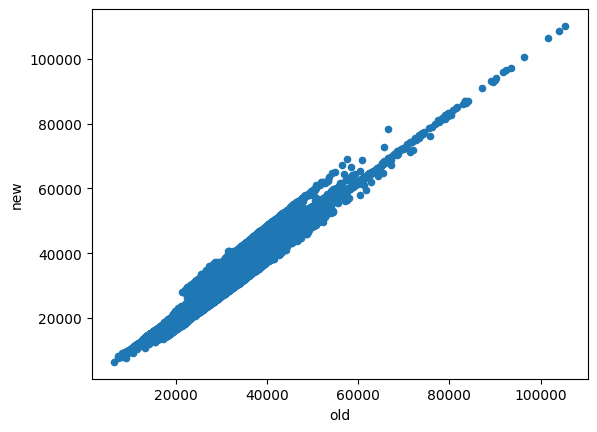

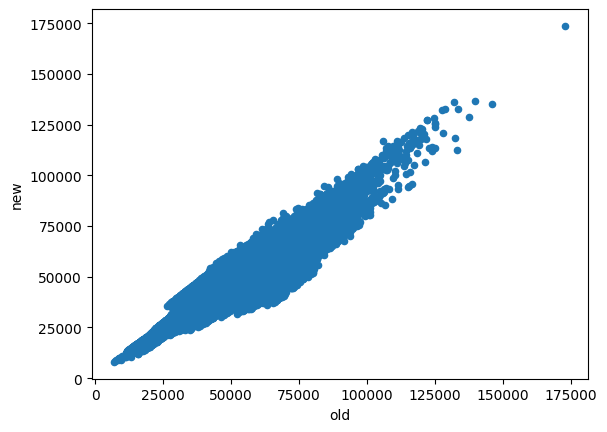

In [111]:
def show_diff(df1, df2, df_cap):
    """
    'load_total_pre_upgrade_VA_220_83',
    'load_total_post_upgrade_VA_220_83',
    'load_total_post_upgrade_VA_220_87'
    """
    dfc = pd.concat([
        df1["building_id"],
        df1['load_total_post_upgrade_VA_220_83'].rename("old"),
        df2['load_total_post_upgrade_VA_220_83'].rename("new"),
        df1['amp_total_post_upgrade_A_220_83'].rename("old_amp"),
        df2['amp_total_post_upgrade_A_220_83'].rename("new_amp"),
    ], axis=1)
    dfc["diff"] = (dfc["new"] - dfc["old"])/dfc["old"]
    dfc["panel_amp"] = dfc["building_id"].astype(int).map(df_cap.set_index("building_id")["predicted_panel_amp"])
    dfc = dfc.assign(old_panel_rep = lambda x: x.old_amp > x.panel_amp)
    dfc = dfc.assign(new_panel_rep = lambda x: x.new_amp > x.panel_amp)
    rep_old = dfc["old_panel_rep"].sum()/len(dfc)
    rep_new = dfc["new_panel_rep"].sum()/len(dfc)

    # display(dfc)
    print("Change in post-upgrade load (VA)")
    display(dfc["diff"].describe())
    print("Change in panel replacement")
    print(f' % with replacement: {round(rep_old, 2)} -> {round(rep_new, 2)} ({(rep_new-rep_old)/rep_old*100:.02f} %)')
    dfc.plot(kind="scatter", x="old", y="new")

    return (((dfc["new"] - dfc["old"])).mean(), dfc["diff"].mean(), rep_old, rep_new)

show_diff(df1, df2, df_cap)

print("Revision with Level 2 EVSE:")
show_diff(df1r, df2r, df_cap)


For upgrade 01
Change in post-upgrade load (VA)


count    346396.000000
mean          0.018125
std           0.042914
min          -0.252125
25%           0.005373
50%           0.018756
75%           0.032509
max           0.446731
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.48 -> 0.49 (2.40 %)

For upgrade 02
Change in post-upgrade load (VA)


count    424737.000000
mean          0.016601
std           0.039712
min          -0.246139
25%           0.003309
50%           0.016888
75%           0.030891
max           0.439651
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.43 -> 0.44 (2.52 %)

For upgrade 03
Change in post-upgrade load (VA)


count    482745.000000
mean          0.020451
std           0.036287
min          -0.184667
25%           0.006262
50%           0.018066
75%           0.031906
max           0.446731
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.37 -> 0.38 (3.31 %)

For upgrade 04
Change in post-upgrade load (VA)


count    424737.000000
mean          0.022121
std           0.044927
min          -0.245595
25%           0.004263
50%           0.019888
75%           0.040084
max           0.439651
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.33 -> 0.35 (4.03 %)

For upgrade 05
Change in post-upgrade load (VA)


count    482745.000000
mean          0.025605
std           0.040637
min          -0.184807
25%           0.007607
50%           0.021153
75%           0.040329
max           0.446731
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.28 -> 0.3 (4.92 %)

For upgrade 06
Change in post-upgrade load (VA)


count    483058.000000
mean          0.022689
std           0.040542
min          -0.261953
25%           0.007014
50%           0.020710
75%           0.035532
max           0.540532
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.3 -> 0.31 (4.02 %)

For upgrade 07
Change in post-upgrade load (VA)


count    483058.000000
mean          0.028821
std           0.045748
min          -0.262235
25%           0.008623
50%           0.024460
75%           0.045808
max           0.540532
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.21 -> 0.22 (7.19 %)

For upgrade 08
Change in post-upgrade load (VA)


count    402691.000000
mean          0.020787
std           0.043768
min          -0.237795
25%           0.006245
50%           0.019732
75%           0.036631
max           0.446731
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.38 -> 0.39 (3.54 %)

For upgrade 09
Change in post-upgrade load (VA)


count    424738.000000
mean          0.011781
std           0.040146
min          -0.247499
25%           0.002598
50%           0.013850
75%           0.023665
max           0.301927
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.37 -> 0.38 (1.97 %)

For upgrade 10
Change in post-upgrade load (VA)


count    482746.000000
mean          0.015492
std           0.035840
min          -0.186019
25%           0.003649
50%           0.014624
75%           0.024694
max           0.304782
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.32 -> 0.32 (2.70 %)

For upgrade 11
Change in post-upgrade load (VA)


count    424738.000000
mean          0.015240
std           0.043917
min          -0.247036
25%           0.002868
50%           0.016045
75%           0.029339
max           0.301927
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.3 -> 0.3 (2.52 %)

For upgrade 12
Change in post-upgrade load (VA)


count    482746.000000
mean          0.018780
std           0.038954
min          -0.185570
25%           0.004538
50%           0.016596
75%           0.029714
max           0.304782
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.25 -> 0.26 (3.20 %)

For upgrade 13
Change in post-upgrade load (VA)


count    483059.000000
mean          0.017396
std           0.040450
min          -0.264682
25%           0.004378
50%           0.016668
75%           0.027851
max           0.388523
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.24 -> 0.25 (3.43 %)

For upgrade 14
Change in post-upgrade load (VA)


count    483059.000000
mean          0.021376
std           0.044346
min          -0.263774
25%           0.005342
50%           0.019281
75%           0.034040
max           0.388523
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.16 -> 0.17 (6.45 %)

For upgrade 15
Change in post-upgrade load (VA)


count    402693.000000
mean          0.014364
std           0.043146
min          -0.232530
25%           0.003546
50%           0.015508
75%           0.027364
max           0.304782
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.33 -> 0.34 (2.62 %)

For upgrade 16
Change in post-upgrade load (VA)


count    483058.000000
mean          0.021607
std           0.038412
min          -0.199721
25%           0.006654
50%           0.019330
75%           0.033757
max           0.467455
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.34 -> 0.35 (3.46 %)

For upgrade 17
Change in post-upgrade load (VA)


count    483058.000000
mean          0.027206
std           0.043085
min          -0.201444
25%           0.008124
50%           0.022744
75%           0.043001
max           0.467455
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.25 -> 0.26 (5.21 %)

For upgrade 18
Change in post-upgrade load (VA)


count    483059.000000
mean          0.016466
std           0.038063
min          -0.202415
25%           0.003958
50%           0.015687
75%           0.026301
max           0.320435
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.28 -> 0.29 (2.93 %)

For upgrade 19
Change in post-upgrade load (VA)


count    483059.000000
mean          0.020065
std           0.041486
min          -0.201977
25%           0.004958
50%           0.017974
75%           0.031868
max           0.320435
Name: diff, dtype: float64

Change in panel replacement
 % with replacement: 0.21 -> 0.22 (3.79 %)


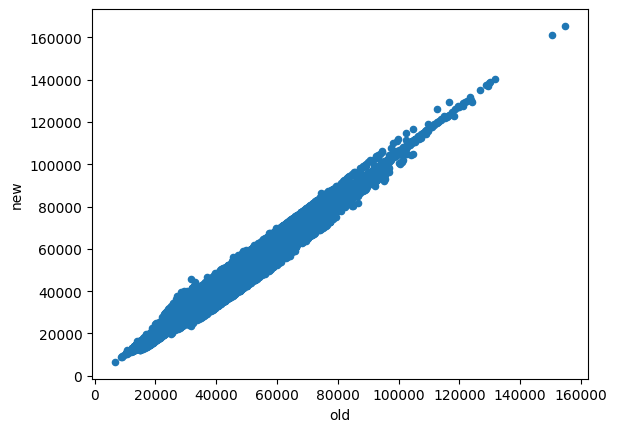

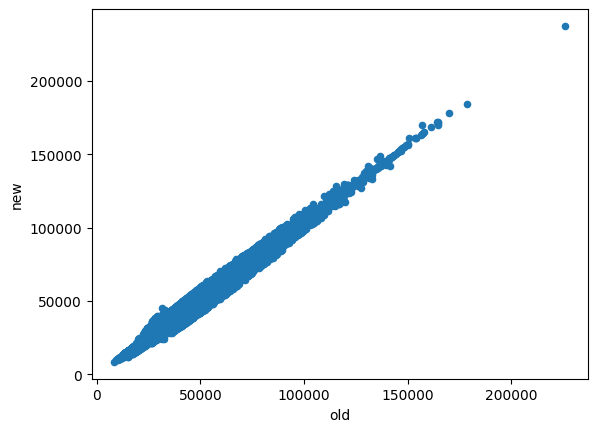

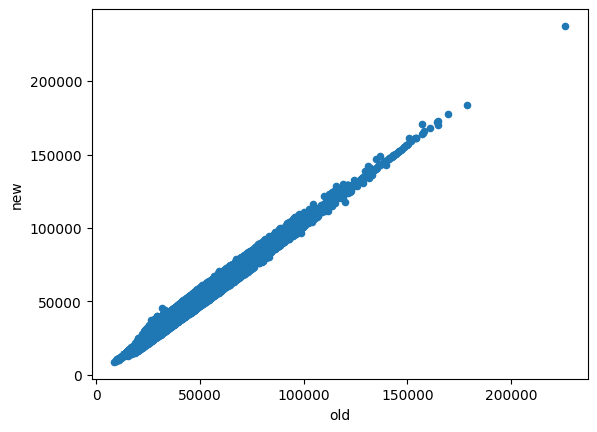

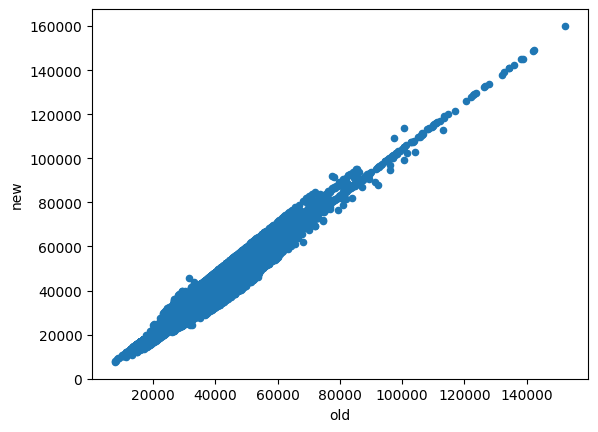

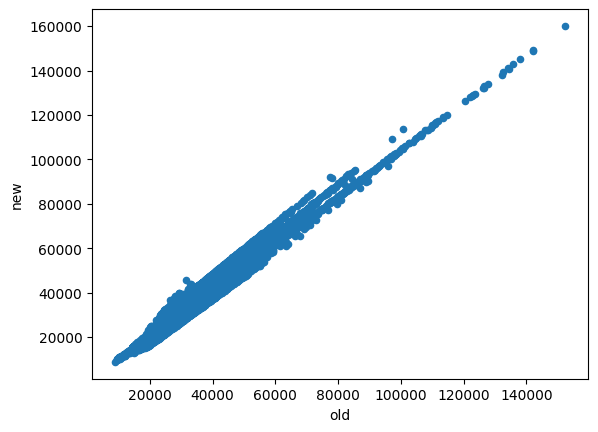

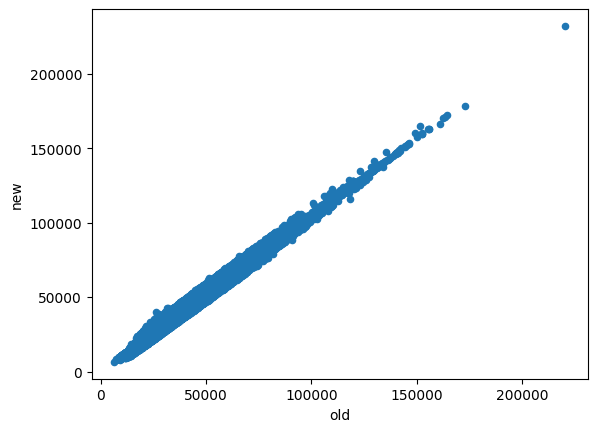

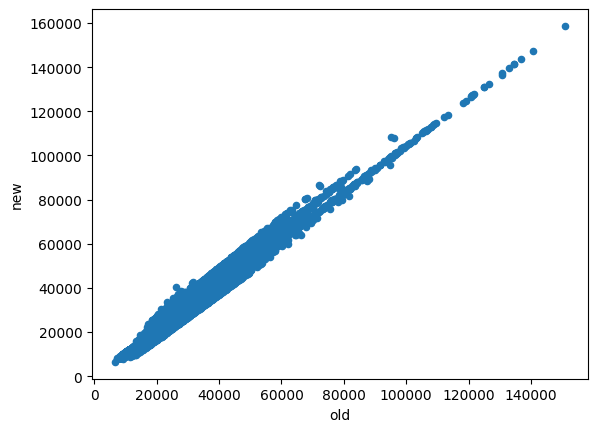

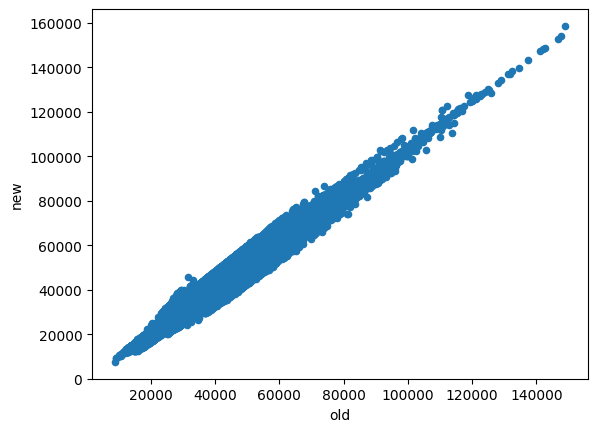

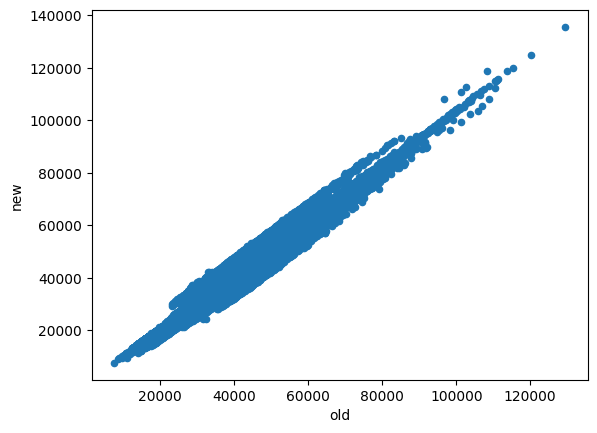

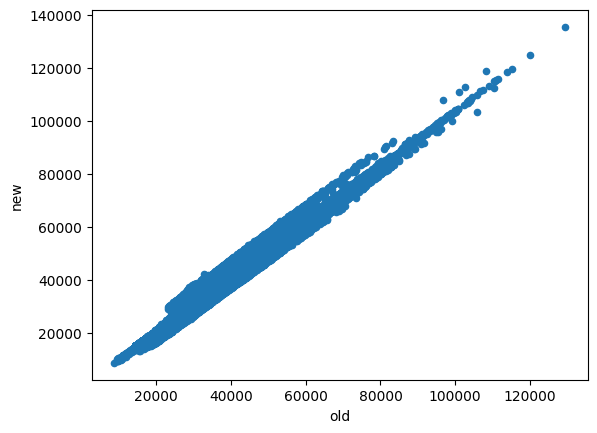

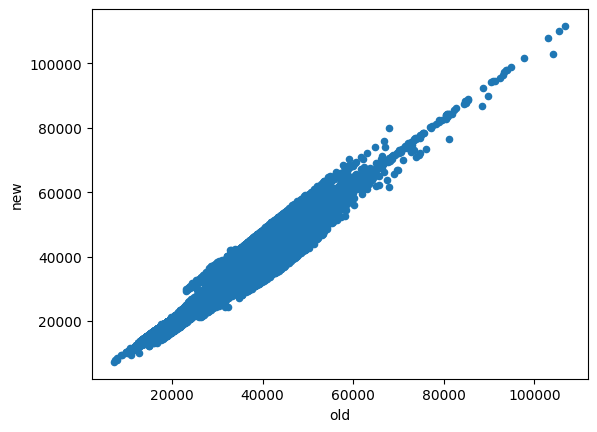

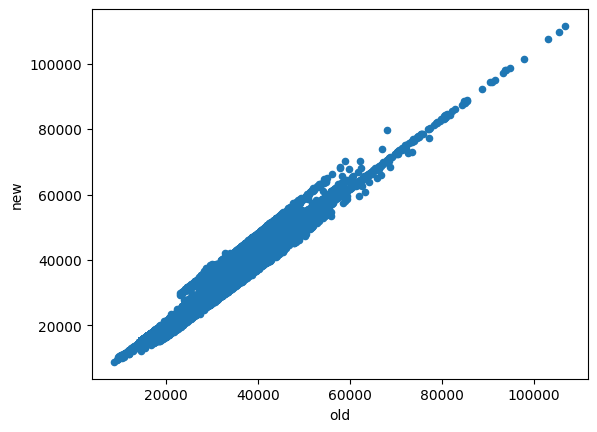

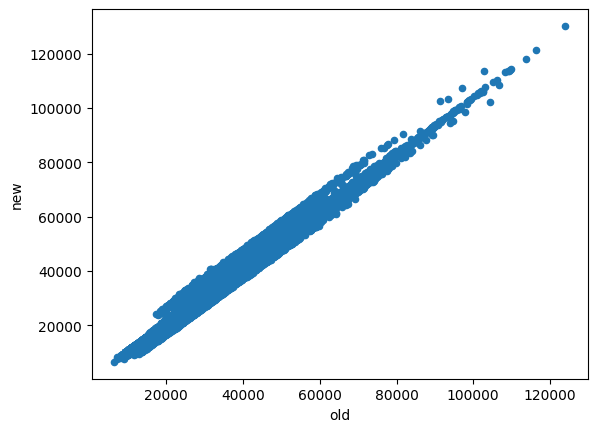

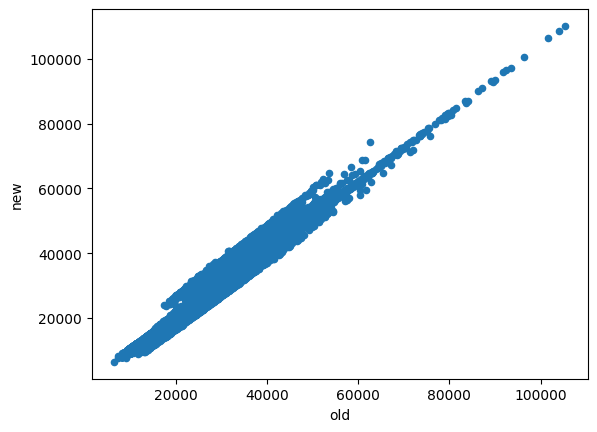

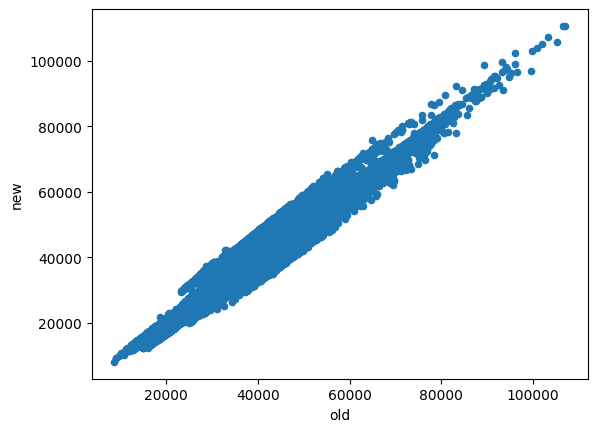

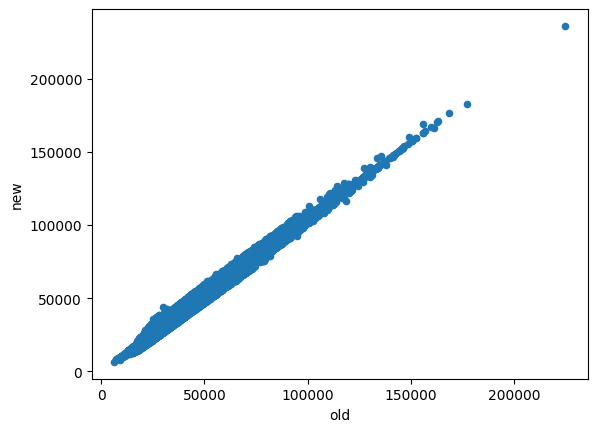

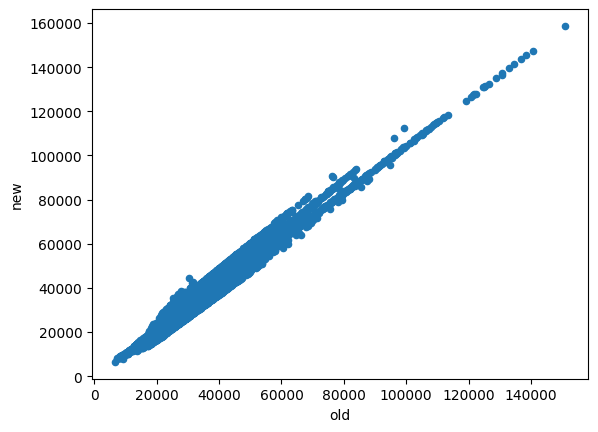

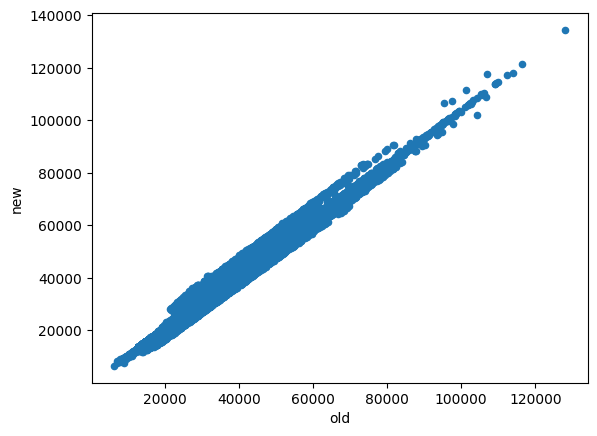

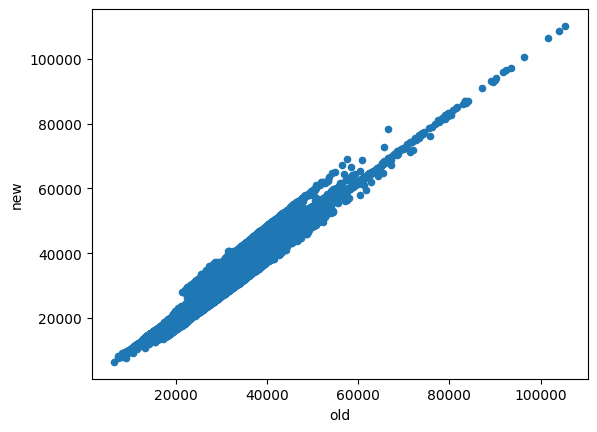

In [112]:
df_cap = pd.read_csv("/Volumes/Lixi_Liu/panels_results_550k/panel_capacity/panel_result__model_7bins__tsv_based__predicted_panels_probablistically_assigned.csv")

data= []
for i in range(1,20):
    df1 = pd.read_parquet(f"/Volumes/Lixi_Liu/panels_results_550k/old_nec_calculations_ev_level2/results_up{i:02d}__res_map__nec_new_load_exploded.parquet")
    df2 = pd.read_parquet(f"/Volumes/Lixi_Liu/panels_results_550k/nec_calculations_ev_level2/results_up{i:02d}__res_map__nec_new_load_exploded.parquet")
    print(f"\nFor upgrade {i:02d}")
    data.append(show_diff(df1, df2, df_cap))

In [118]:
F = pd.DataFrame(data, columns=["mean_change_in_load_VA", "relative_change_in_load", "frac_cap_constraint_old", "frac_cap_constraint_new"])
F = pd.concat([pd.Series(range(1, 20), name="upgrade"), F], axis=1)
F["net_change_in_frac_cap_constraint"] = F["frac_cap_constraint_new"] - F["frac_cap_constraint_old"]
F

,upgrade,mean_change_in_load_VA,relative_change_in_load,frac_cap_constraint_old,frac_cap_constraint_new,net_change_in_frac_cap_constraint
0,1,717.869552,0.018125,0.479486,0.491013,0.011527
1,2,676.035507,0.016601,0.431992,0.442872,0.010880
2,3,775.650836,0.020451,0.370154,0.382419,0.012265
3,4,758.208064,0.022121,0.332891,0.346290,0.013399
4,5,847.950589,0.025605,0.282315,0.296210,0.013896
5,6,775.456307,0.022689,0.299225,0.311246,0.012021
6,7,847.709212,0.028821,0.205530,0.220317,0.014787
7,8,718.291928,0.020787,0.380793,0.394255,0.013462
8,9,402.876048,0.011781,0.371403,0.378713,0.007310
9,10,515.939428,0.015492,0.316357,0.324906,0.008549


In [125]:
### Compare avg HP capacity for min-eff HP (HERS sized) vs. high-eff (MaxLoad)
df2 = pd.read_parquet("/Volumes/Lixi_Liu/panels_results_550k/results_up02.parquet")
df4 = pd.read_parquet("/Volumes/Lixi_Liu/panels_results_550k/results_up04.parquet")

for col in [
    'upgrade_costs.size_heating_system_primary_k_btu_h',
    'upgrade_costs.size_heat_pump_backup_primary_k_btu_h',
]: 
    df2[col] = df2[col].astype(float)
    df4[col] = df4[col].astype(float)


In [127]:
col = 'upgrade_costs.size_heating_system_primary_k_btu_h'
print(f"Min-eff HP cap:\n{df2[col].replace(0, np.nan).describe()}")
print(f"High-eff HP cap:\n{df4[col].replace(0, np.nan).describe()}")

Min-eff HP cap:
count    423947.000000
mean         49.022336
std          33.688749
min           3.180000
25%          24.040000
50%          42.300000
75%          65.650000
max         459.540000
Name: upgrade_costs.size_heating_system_primary_k_btu_h, dtype: float64
High-eff HP cap:
count    423947.000000
mean         53.200136
std          37.131948
min           3.180000
25%          25.750000
50%          45.550000
75%          71.270000
max         523.310000
Name: upgrade_costs.size_heating_system_primary_k_btu_h, dtype: float64


In [131]:
col = 'upgrade_costs.size_heating_system_primary_k_btu_h'
diff = df4[col] - df2[col]
diff.replace(0, np.nan).describe()

count    416144.000000
mean          4.256137
std          39.878466
min        -382.840000
25%          -7.710000
50%           3.230000
75%          15.450000
max         450.370000
Name: upgrade_costs.size_heating_system_primary_k_btu_h, dtype: float64

In [128]:
col = 'upgrade_costs.size_heat_pump_backup_primary_k_btu_h'
print(f"Min-eff HP backup cap:\n{df2[col].replace(0, np.nan).describe()}")
# these are homes in cold climate where the compressor locks out before the design temp and the backup will meet 100% of the heat load
print(f"High-eff HP backup cap:\n{df4[col].replace(0, np.nan).describe()}") 

Min-eff HP backup cap:
count    388701.000000
mean         24.334381
std          23.724927
min           0.010000
25%           7.990000
50%          17.620000
75%          33.150000
max         459.540000
Name: upgrade_costs.size_heat_pump_backup_primary_k_btu_h, dtype: float64
High-eff HP backup cap:
count    21991.000000
mean        41.867053
std         28.665736
min          1.060000
25%         21.950000
50%         36.250000
75%         55.135000
max        306.940000
Name: upgrade_costs.size_heat_pump_backup_primary_k_btu_h, dtype: float64


In [156]:
col = 'upgrade_costs.size_heat_pump_backup_primary_k_btu_h'
bldgs = df4.loc[df4[col]>0, "building_id"]
diff = df4.loc[df4["building_id"].isin(bldgs)].set_index("building_id")[col] - df2.loc[df2["building_id"].isin(bldgs)].set_index("building_id")[col]
print(len(diff) / len(df4))
diff.describe()

0.05177556935232862


count    21991.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: upgrade_costs.size_heat_pump_backup_primary_k_btu_h, dtype: float64

In [162]:
df02 = pd.read_parquet("/Volumes/Lixi_Liu/panels_results_550k/nec_calculations_no_ev/results_up02__res_map__nec_new_load_exploded.parquet")
df04 = pd.read_parquet("/Volumes/Lixi_Liu/panels_results_550k/nec_calculations_no_ev/results_up04__res_map__nec_new_load_exploded.parquet")

In [168]:
((df04['new_load_hvac_83'] - df02['new_load_hvac_83']) / df02['new_load_hvac_83']).describe()

count    420530.000000
mean          0.149582
std           1.813115
min          -0.989685
25%          -0.528213
50%          -0.331324
75%           0.010374
max          69.265018
Name: new_load_hvac_83, dtype: float64

In [11]:
model = "7bins" # <--- "5bins"
if model == "7bins":
    metric_cols = ["<100", "100", "101-124","125", "126-199", "200", "201+"]
elif model == "5bins":
    metric_cols = ["<100", "100", "101-199", "200", "201+"]

main_dir = Path("/Volumes/Lixi_Liu/panels_results_550k")
baseline_file = main_dir / "results_up00.parquet"
model_file = main_dir / "panel_capacity" / f"panel_result__model_{model}__tsv_based__predicted_panels_probablistically_assigned.csv"
model_file_prob = main_dir / "panel_capacity" / f"panel_result__model_{model}__tsv_based__predicted_panels_in_probability.csv"
nec_file = main_dir / "nec_calculations_existing_load" / "results_up00__res_map__nec_existing_load_exploded.parquet"


### Specify filters to apply to all data

In [12]:
### specify filters as query
has_filter = False # <---

if has_filter:
    filter_query = "`build_existing_model.state` == 'CA' & `build_existing_model.geometry_building_type_recs` == 'Single-Family Detached'" # <---
    folder_ext = "__CA_SFD_only" # <---
    print(f"All input datasets will be filtered using query statement: \n{filter_query}")
else:
    folder_ext = ""
    print("No filter will be applied to the input datasets")

No filter will be applied to the input datasets


In [13]:
output_dir = main_dir / "plots" / f"model_{model}_for_paper{folder_ext}"
output_dir.mkdir(exist_ok=True, parents=True)
print(f"All results will be output to: \n{output_dir}")

All results will be output to: 
/Volumes/Lixi_Liu/panels_results_550k/plots/model_7bins_for_paper


In [14]:
def parse_suffix(file):
    suffixes = file.suffixes
    assert suffixes != [], f"{file=} has no suffixes."
    suffix = "".join(suffixes)
    return suffix

def read_file(file):
    suffix = parse_suffix(file)
    if suffix == ".csv" or suffix == ".csv.gz":
        return pd.read_csv(file, compression="infer", low_memory=False, keep_default_na=False)
    if suffix == ".parquet":
        return pd.read_parquet(file)
    raise ValueError(f"Unsupported {suffix=}")
    
def save_filtered_df_to_file(df, original_filename: Path, output_dir: Path | None):
    new_file = original_filename.stem + "__filtered.csv"
    if output_dir is None:
        new_filename = original_filename.parent / new_file
    else:
        new_filename = output_dir / new_file

    df.to_csv(new_filename, index=False)


In [15]:
def sample_panel_size_unweighted(x):
    """ sample panel size with unweighted (i.e., equally weighted) """
    if x == "<100":
        labels = np.array([30, 60, 70, 90])
        weights = np.ones(len(labels))
    elif x == "101-124":
        labels = np.array([120])
        weights = np.ones(len(labels))
    elif x == "126-199":
        labels = np.array([150, 175])
        weights = np.ones(len(labels))
    elif x == "101-199":
        labels = np.array([120, 125, 150, 175])
        weights = np.ones(len(labels))
    elif x == "201+":
        labels = np.concatenate([
            np.array([225, 250, 275, 300, 325, 350, 375]), 
            np.arange(400, 1100, 100)
        ])
        weights = np.ones(len(labels))
    else:
        return int(x)
    return random.choices(labels, weights=weights, k=1)[0]

# for use with rep value distribution
def weighted_sample(x):
    return random.choices(x[0], weights=x[1], k=1)[0]

def map_lookup_sample(df, lookup):
    # <= 200 amp
    lkup = lookup.loc[lookup["Panel size bin"] != "201+"].set_index(["Panel size bin"])
    elec = df["build_existing_model.heating_fuel"] == "Electricity"
    df.loc[elec, "predicted_panel_amp"] = df.loc[elec, "predicted_panel_amp_bin"].map(lkup["Electric heating fuel"])
    df.loc[~elec, "predicted_panel_amp"] = df.loc[~elec, "predicted_panel_amp_bin"].map(lkup["Non-electric heating fuel"])

    # 201+ amp
    lkup = lookup.loc[lookup["Panel size bin"] == "201+"].set_index(["Floor area"])
    amp201plus = df["predicted_panel_amp_bin"]=="201+"
    df.loc[elec & amp201plus,  "predicted_panel_amp"] = df.loc[elec & amp201plus,  "build_existing_model.geometry_floor_area"].map(
        lkup["Electric heating fuel"]
    )
    df.loc[~elec & amp201plus,  "predicted_panel_amp"] = df.loc[~elec & amp201plus,  "build_existing_model.geometry_floor_area"].map(
        lkup["Non-electric heating fuel"]
    )
    return df
    
    

### Assign value to panel bin labels if missing

In [16]:
### predicted panel sizes
method = "lookup" # <--- unweighted, weighted, lookup (still need to be constructed)

df_baseline = read_file(baseline_file)
df = read_file(model_file)
if not [x for x in df.columns if x.startswith("build_existing_model.")]:
    df = df_baseline.join(df.set_index("building_id"), on="building_id")
if has_filter:
    df = df.query(filter_query).reset_index(drop=True)
    save_filtered_df_to_file(df, model_file, output_dir=output_dir)
    
df["predicted_panel_amp_bin"] = df["predicted_panel_amp_bin"].astype(str)

# sample exact values for panel labels
random.seed(10)
if not "predicted_panel_amp" in df.columns:
    print("No preassigned panel amps, mapping...")
    if method == "unweighted":
        df["predicted_panel_amp"] = df["predicted_panel_amp_bin"].apply(sample_panel_size_unweighted).astype(int)
    elif method == "weighted":
        panel_value_dist = pd.read_csv("model_20240517/weighted_standardized_panel_bin_values.csv").set_index(["panel_amp_pre_bin_7"])["panel_amp_dist"]
        df["predicted_panel_amp"] = df["predicted_panel_amp_bin"].map(panel_value_dist).apply(weighted_sample).astype(int)
    elif method == "lookup":
        lookup = pd.read_csv("model_20240517/panels_bin_lookup_final.csv")
        df = map_lookup_sample(df, lookup)
    else:
        raise NotImplementedError(f"{method=} not implemented")
df

,building_id,job_id,started_at,completed_at,completed_status,apply_upgrade.applicable,apply_upgrade.upgrade_name,apply_upgrade.reference_scenario,build_existing_model.ahs_region,build_existing_model.aiannh_area,...,report_utility_bills.utility_rates_fixed_variable_total_usd,report_utility_bills.utility_rates_fixed_variable_wood_cord_energy_usd,report_utility_bills.utility_rates_fixed_variable_wood_cord_fixed_usd,report_utility_bills.utility_rates_fixed_variable_wood_cord_total_usd,report_utility_bills.utility_rates_fixed_variable_wood_pellets_energy_usd,report_utility_bills.utility_rates_fixed_variable_wood_pellets_fixed_usd,report_utility_bills.utility_rates_fixed_variable_wood_pellets_total_usd,step_failures,predicted_panel_amp_bin,predicted_panel_amp
0,1,181,2024-08-15 13:45:49,2024-08-15 13:46:10,Success,<NA>,<NA>,,Non-CBSA East South Central,Yes,...,2388.73,0.0,0,0.0,0,0,0,None,200,200
1,2,262,2024-08-16 13:33:53,2024-08-16 13:34:13,Success,<NA>,<NA>,,Non-CBSA New England,No,...,5422.48,326.82,0,326.82,0,0,0,None,<100,60
2,3,262,2024-08-16 14:17:45,2024-08-16 14:18:08,Success,<NA>,<NA>,,"CBSA Boston-Cambridge-Newton, MA-NH",No,...,2464.49,0.0,0,0.0,0,0,0,None,100,100
3,4,102,2024-08-15 06:32:40,2024-08-15 06:32:59,Success,<NA>,<NA>,,Non-CBSA West South Central,No,...,2649.14,0.0,0,0.0,0,0,0,None,200,200
4,5,28,2024-08-14 17:54:32,2024-08-14 17:54:56,Success,<NA>,<NA>,,"CBSA Riverside-San Bernardino-Ontario, CA",No,...,2507.5,0.0,0,0.0,0,0,0,None,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483058,549995,288,2024-08-15 18:34:05,2024-08-15 18:34:36,Success,<NA>,<NA>,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",No,...,2643.2,0.0,0,0.0,0,0,0,None,200,200
483059,549996,201,2024-08-16 08:01:45,2024-08-16 08:02:16,Success,<NA>,<NA>,,Non-CBSA South Atlantic,No,...,2979.78,0.0,0,0.0,0,0,0,None,200,200
483060,549997,267,2024-08-16 14:10:45,2024-08-16 14:11:13,Success,<NA>,<NA>,,Non-CBSA Middle Atlantic,No,...,4099.49,1108.46,0,1108.46,0,0,0,None,100,100
483061,549998,129,2024-08-15 08:33:08,2024-08-15 08:33:35,Success,<NA>,<NA>,,"CBSA Los Angeles-Long Beach-Anaheim, CA",No,...,1967.96,0.0,0,0.0,0,0,0,None,100,100


In [17]:
df["predicted_panel_amp_bin"] = pd.Categorical(df["predicted_panel_amp_bin"], ordered=True, categories=metric_cols)

# load prediction in probabilities
dfm = read_file(model_file_prob)
if has_filter:
    if not [x for x in dfm.columns if x.startswith("build_existing_model.")]:
        dfm = df_baseline.join(dfm.set_index("building_id"), on="building_id")
    dfm = dfm.query(filter_query).reset_index(drop=True)
    save_filtered_df_to_file(dfm, model_file_prob, output_dir=output_dir)
    
dfm = df.join(dfm.set_index("building_id")[metric_cols], on="building_id")
del df

# occupied only
dfm = dfm.loc[dfm["build_existing_model.vacancy_status"]=="Occupied"].reset_index(drop=True)
dfm

,building_id,job_id,started_at,completed_at,completed_status,apply_upgrade.applicable,apply_upgrade.upgrade_name,apply_upgrade.reference_scenario,build_existing_model.ahs_region,build_existing_model.aiannh_area,...,step_failures,predicted_panel_amp_bin,predicted_panel_amp,<100,100,101-124,125,126-199,200,201+
0,1,181,2024-08-15 13:45:49,2024-08-15 13:46:10,Success,<NA>,<NA>,,Non-CBSA East South Central,Yes,...,None,200,200,0.004376,0.025145,0.001621,0.015369,0.004582,0.919393,0.029514
1,2,262,2024-08-16 13:33:53,2024-08-16 13:34:13,Success,<NA>,<NA>,,Non-CBSA New England,No,...,None,<100,60,0.014458,0.547731,0.002360,0.119583,0.017033,0.282907,0.015926
2,3,262,2024-08-16 14:17:45,2024-08-16 14:18:08,Success,<NA>,<NA>,,"CBSA Boston-Cambridge-Newton, MA-NH",No,...,None,100,100,0.159568,0.484735,0.001733,0.166111,0.047494,0.073933,0.066425
3,4,102,2024-08-15 06:32:40,2024-08-15 06:32:59,Success,<NA>,<NA>,,Non-CBSA West South Central,No,...,None,200,200,0.073138,0.253399,0.001286,0.106491,0.028595,0.510522,0.026569
4,5,28,2024-08-14 17:54:32,2024-08-14 17:54:56,Success,<NA>,<NA>,,"CBSA Riverside-San Bernardino-Ontario, CA",No,...,None,200,200,0.040686,0.452232,0.002675,0.161170,0.029616,0.298037,0.015583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483058,549995,288,2024-08-15 18:34:05,2024-08-15 18:34:36,Success,<NA>,<NA>,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",No,...,None,200,200,0.009847,0.746199,0.002532,0.043968,0.016354,0.160201,0.020899
483059,549996,201,2024-08-16 08:01:45,2024-08-16 08:02:16,Success,<NA>,<NA>,,Non-CBSA South Atlantic,No,...,None,200,200,0.008764,0.050361,0.008597,0.028233,0.017243,0.865030,0.021772
483060,549997,267,2024-08-16 14:10:45,2024-08-16 14:11:13,Success,<NA>,<NA>,,Non-CBSA Middle Atlantic,No,...,None,100,100,0.006292,0.446271,0.007461,0.078571,0.034957,0.391617,0.034830
483061,549998,129,2024-08-15 08:33:08,2024-08-15 08:33:35,Success,<NA>,<NA>,,"CBSA Los Angeles-Long Beach-Anaheim, CA",No,...,None,100,100,0.006046,0.052494,0.002240,0.024850,0.022883,0.882563,0.008924


In [18]:
### NEC calc of existing loads
dfn = read_file(nec_file)
if not [x for x in dfn.columns if x.startswith("build_existing_model.")]:
    dfn = df_baseline.join(dfn.set_index("building_id"), on="building_id")
    del df_baseline
if has_filter:
    dfn = dfn.query(filter_query).reset_index(drop=True)
    save_filtered_df_to_file(dfn, nec_file, output_dir=output_dir)

# occupied only
dfn = dfn.loc[dfn["build_existing_model.vacancy_status"]=="Occupied"].reset_index(drop=True)
dfn["amp_total_pre_upgrade_A_220_83"] = dfn["amp_total_pre_upgrade_A_220_83"].astype(float)
dfn["amp_total_pre_upgrade_A_220_87"] = dfn["amp_total_pre_upgrade_A_220_87"].astype(float)
dfn

,building_id,job_id,started_at,completed_at,completed_status,apply_upgrade.applicable,apply_upgrade.upgrade_name,apply_upgrade.reference_scenario,build_existing_model.ahs_region,build_existing_model.aiannh_area,...,load_washer,load_dishwasher,load_others,load_well_pump,load_pool_pump,load_total_pre_upgrade_VA_220_83,amp_total_pre_upgrade_A_220_83,load_total_pre_upgrade_VA_220_87,amp_total_pre_upgrade_A_220_87,has_garbage_disposal
0,1,181,2024-08-15 13:45:49,2024-08-15 13:46:10,Success,<NA>,<NA>,,Non-CBSA East South Central,Yes,...,0,0.0,120.0,0.0,0.0,21864.213558,91.100890,17386.750,72.444792,False
1,2,262,2024-08-16 13:33:53,2024-08-16 13:34:13,Success,<NA>,<NA>,,Non-CBSA New England,No,...,0,0.0,679.0,0.0,0.0,11541.866160,48.091109,4765.375,19.855729,True
2,3,262,2024-08-16 14:17:45,2024-08-16 14:18:08,Success,<NA>,<NA>,,"CBSA Boston-Cambridge-Newton, MA-NH",No,...,0,1200.0,679.0,0.0,0.0,13557.671920,56.490300,6757.125,28.154688,True
3,4,102,2024-08-15 06:32:40,2024-08-15 06:32:59,Success,<NA>,<NA>,,Non-CBSA West South Central,No,...,0,0.0,679.0,0.0,0.0,15202.952320,63.345635,7315.500,30.481250,True
4,5,28,2024-08-14 17:54:32,2024-08-14 17:54:56,Success,<NA>,<NA>,,"CBSA Riverside-San Bernardino-Ontario, CA",No,...,0,0.0,679.0,0.0,0.0,9463.214080,39.430059,5209.125,21.704687,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483058,549995,288,2024-08-15 18:34:05,2024-08-15 18:34:36,Success,<NA>,<NA>,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",No,...,0,0.0,120.0,0.0,0.0,11702.282600,48.759511,9687.750,40.365625,False
483059,549996,201,2024-08-16 08:01:45,2024-08-16 08:02:16,Success,<NA>,<NA>,,Non-CBSA South Atlantic,No,...,0,0.0,493.0,0.0,1491.0,22545.526868,93.939695,17549.500,73.122917,False
483060,549997,267,2024-08-16 14:10:45,2024-08-16 14:11:13,Success,<NA>,<NA>,,Non-CBSA Middle Atlantic,No,...,0,1200.0,120.0,0.0,1491.0,17588.562400,73.285677,13581.500,56.589583,False
483061,549998,129,2024-08-15 08:33:08,2024-08-15 08:33:35,Success,<NA>,<NA>,,"CBSA Los Angeles-Long Beach-Anaheim, CA",No,...,0,1200.0,679.0,0.0,0.0,17282.330668,72.009711,6418.875,26.745313,True


### plot funcs

In [202]:
def extract_left_edge(val):
    # for sorting things like AMI
    if val is None:
        return np.nan
    if not isinstance(val, str):
        return val
    first = val[0]
    if re.search(r"\d", val) or first in ["<", ">"] or first.isdigit():
        vals = [int(x) for x in re.split("\-| |\%|\<|\+|\>|s|th|p|A|B|C| ", val) if re.match("\d", x)]
        if len(vals) > 0:
            num = vals[0]
            if "<" in val:
                num -= 1
            if ">" in val:
                num += 1
            return num
    return val
    
def sort_index(df, axis="index", **kwargs):
    """ axis: ['index', 'columns'] """
    if axis in [0, "index"]:
        try:
            df = df.reindex(sorted(df.index, key=extract_left_edge, **kwargs))
        except TypeError:
            df = df.reindex(sorted(df.index, **kwargs))
        return df

    if axis in [1, "columns"]:
        col_index_name = df.columns.name
        try:
            cols = sorted(df.columns, key=extract_left_edge, **kwargs)
        except TypeError:
            cols = sorted(df.columns, **kwargs)
        df = df[cols]
        df.columns.name = col_index_name
        return df
    raise ValueError(f"axis={axis} is invalid")

def format_labels(lst):
    flst = []
    for idx in lst:
        idx = str(idx)
        if len(idx)/15 > 1:
            size = math.ceil(len(idx) / 2)
            part1 = idx[:size]
            part2 = idx[size:]
            
            for i in range(1, len(part1)+1):
                if part1[-i] == " ":
                    break
            
            for j in range(len(part2)):
                if part2[j] == " ":
                    break
                    
            if i > j:
                k = len(part1)+j
            else:
                k = len(part1)-i
            
            flst.append(idx[:k]+"\n"+idx[k+1:])
        else:
            flst.append(idx)
    return flst

### plots

In [20]:
### make categories for plotting
dfm["build_existing_model.vintage"] = pd.Categorical(dfm["build_existing_model.vintage"], ordered=True, 
        categories=['<1940', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s','2010s'])
dfm["build_existing_model.vintage_acs"] = pd.Categorical(dfm["build_existing_model.vintage_acs"], ordered=True, 
        categories=['<1940', '1940-59', '1960-79', '1980-99', '2000-09', '2010s'])
dfm["build_existing_model.geometry_floor_area"] = pd.Categorical(dfm["build_existing_model.geometry_floor_area"], ordered=True, 
        categories=['0-499', '500-749', '750-999', '1000-1499', '1500-1999', '2000-2499', '2500-2999', '3000-3999', '4000+'])
dfm["build_existing_model.geometry_floor_area_bin"] = pd.Categorical(dfm["build_existing_model.geometry_floor_area_bin"], ordered=True, 
        categories=['0-1499', '1500-2499', '2500-3999', '4000+'])
dfm["build_existing_model.federal_poverty_level"] = pd.Categorical(dfm["build_existing_model.federal_poverty_level"], ordered=True, 
        categories=['0-100%', '100-150%', '150-200%', '200-300%', '300-400%', '400%+'])
dfm["build_existing_model.area_median_income"] = pd.Categorical(dfm["build_existing_model.area_median_income"], ordered=True, 
        categories=['0-30%', '30-60%', '60-80%', '80-100%', '100-120%', '120-150%', '150%+'])

### [1] plot probability of labels by one variable

no plot for build_existing_model.state...


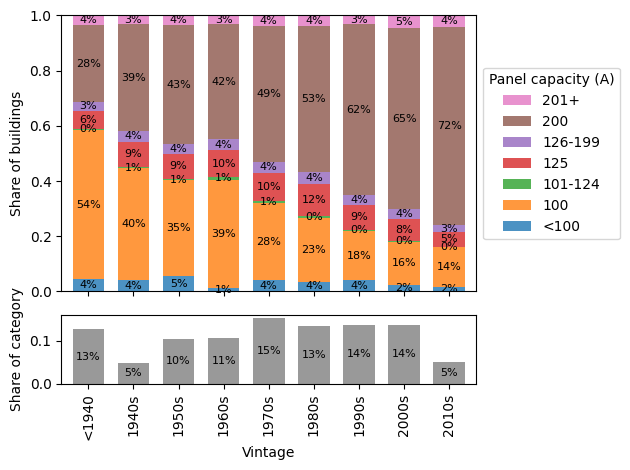

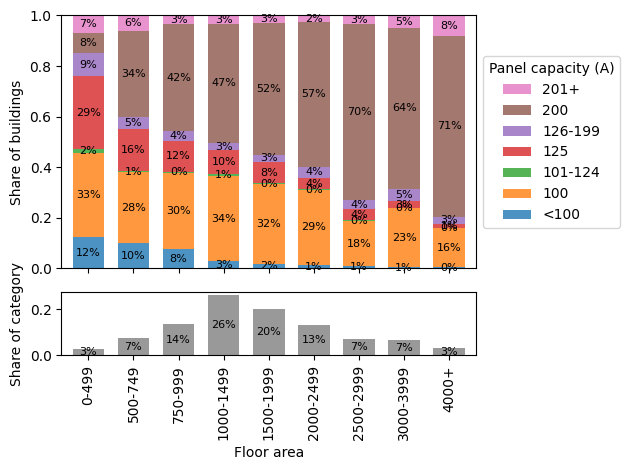

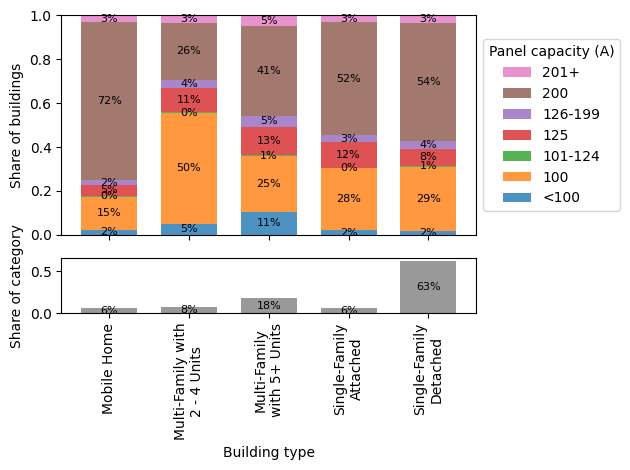

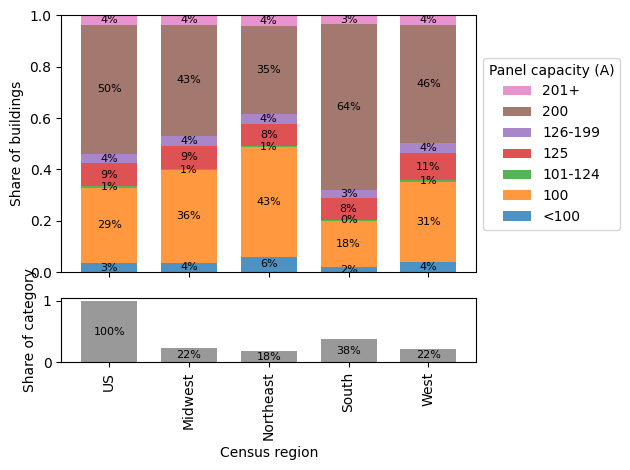

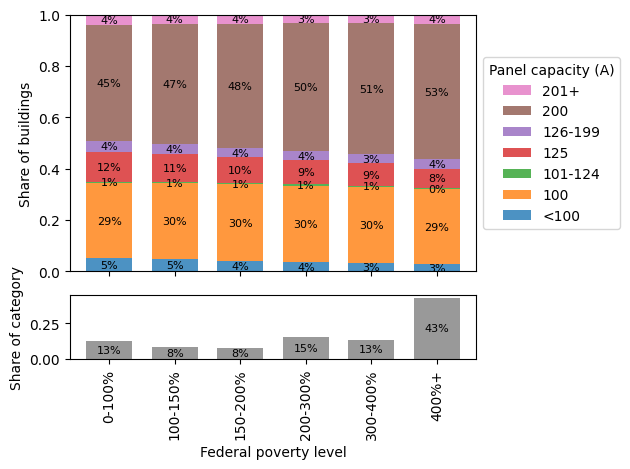

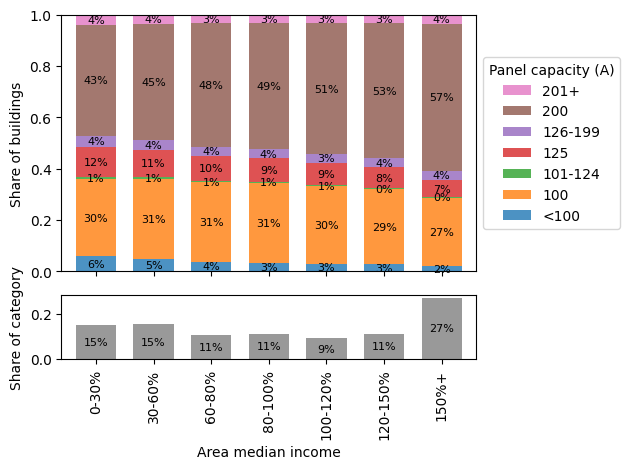

In [21]:
groupby_cols = [
    "build_existing_model.state",
    "build_existing_model.vintage",
    "build_existing_model.geometry_floor_area",
    "build_existing_model.geometry_building_type_recs",
    "build_existing_model.census_region", 
    "build_existing_model.federal_poverty_level",
    "build_existing_model.area_median_income",
]
x_labels = [
    "State",
    "Vintage",
    "Floor area",
    "Building type",
    "Census region", # include additional col for US
    "Federal poverty level",
    "Area median income",
]

for gbc, xlab in zip(groupby_cols, x_labels):
    dfi = dfm.groupby(gbc)[metric_cols].sum()
    dfc = dfm.groupby(gbc)["building_id"].count()
    
    dfi = dfi.divide(dfi.sum(axis=1), axis=0)
    dfi = sort_index(sort_index(dfi, axis=0), axis=1)
    dfc = sort_index(dfc.divide(dfc.sum()))
    
    if gbc == "build_existing_model.census_region":
        # add US total to data
        us = (dfm[metric_cols].sum() / dfm[metric_cols].sum().sum()).rename("US")
        dfi = pd.concat([us, dfi.T], axis=1).T
        dfi.index.name = gbc

        dfc = pd.concat([pd.Series(1, index=["US"]), dfc], axis=0)
        dfc.index.name = gbc

    if gbc == "build_existing_model.state":
        print(f"no plot for {gbc}...")
        pass
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios': [4,1]})
        dfi.plot(kind="bar", stacked=True,  alpha=0.8, width=0.7, ax=ax1)
        ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), reverse=True, title="Panel capacity (A)")
        ax1.set_ylim(0,1)
        ax1.set_ylabel(f"Share of buildings")
    
        for i, row in dfi.reset_index(drop=True).iterrows():
            for j in range(len(row)):
                ax1.text(i, row.iloc[0:j].sum()+row.iloc[j]/2, f"{row.iloc[j]*100:.0f}%", ha="center", va="center", fontsize=8)
    
        dfc.plot(kind="bar", stacked=False, color="gray", alpha=0.8, width=0.7, ax=ax2)
        ax2.set_xticks(ticks = range(len(dfc)), labels = format_labels(dfc.index))
        ax2.set_xlabel(xlab)
        ax2.set_ylabel("Share of category")
    
        for j in range(len(dfc)):
            ax2.text(j, dfc.iloc[j]/2, f"{dfc.iloc[j]*100:.0f}%", ha="center", va="center", fontsize=8)
    
        plt.tight_layout()
        
        metric = f"label_proba_by_{xlab}"
        fig.savefig(output_dir / f"stacked_bar__{metric}.png", dpi=400, bbox_inches="tight")
        dfi.to_csv(output_dir / f"data__stacked_bar__{metric}.csv", index=True)

### [1.1] plot probability of labels by one variable - CA only

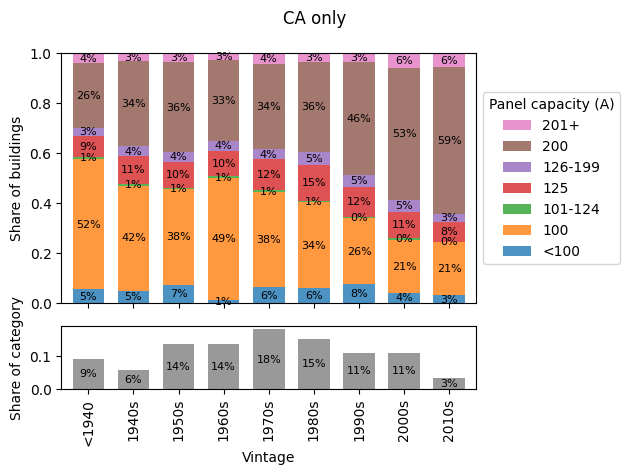

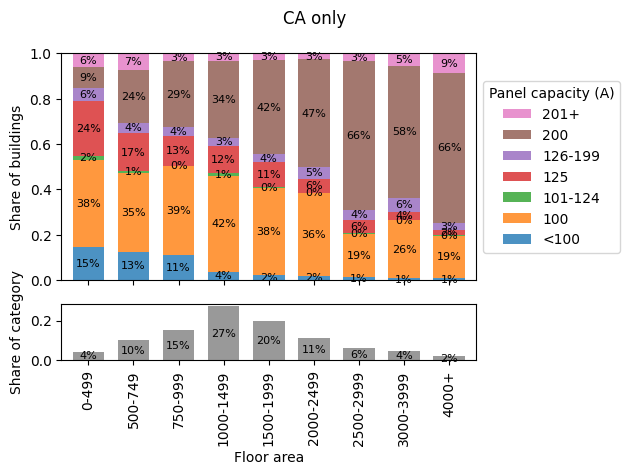

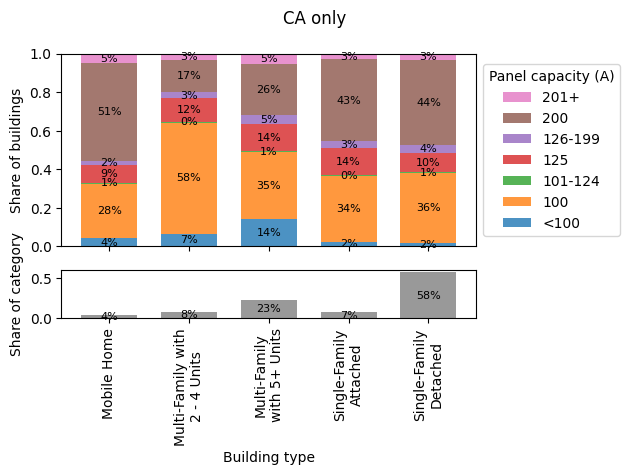

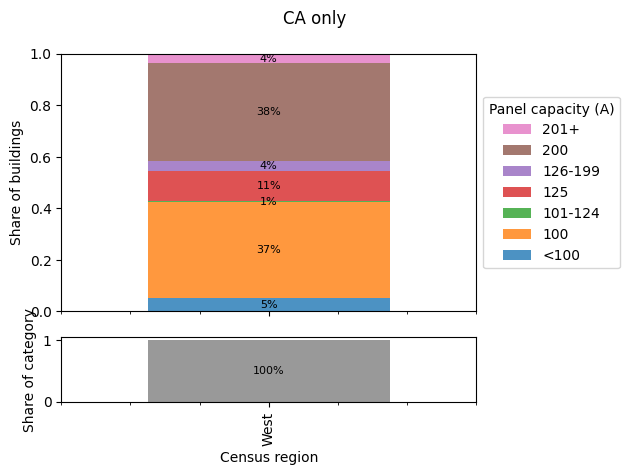

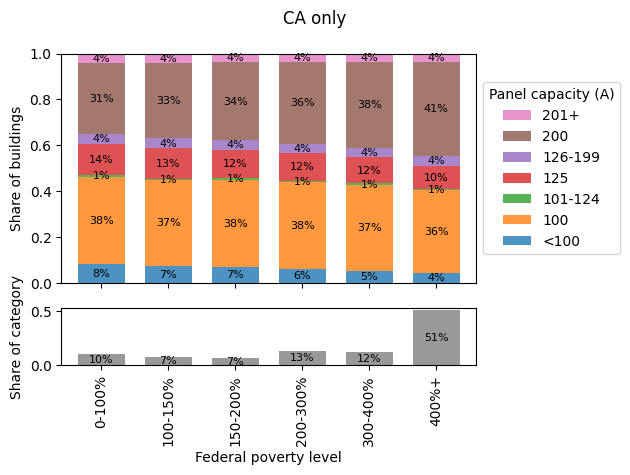

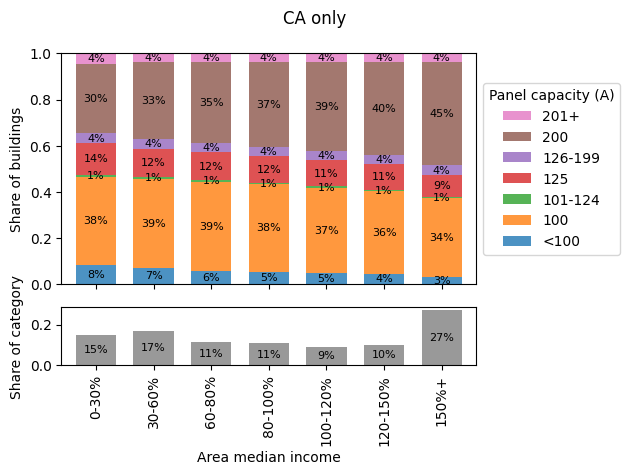

In [22]:
if not has_filter:
    state = "CA" # <---
    cond = dfm["build_existing_model.state"]==state

    #########################################
    groupby_cols = [
        "build_existing_model.vintage",
        "build_existing_model.geometry_floor_area",
        "build_existing_model.geometry_building_type_recs",
        "build_existing_model.census_region", 
        "build_existing_model.federal_poverty_level",
        "build_existing_model.area_median_income",
    ]
    x_labels = [
        "Vintage",
        "Floor area",
        "Building type",
        "Census region",
        "Federal poverty level",
        "Area median income",
    ]

    for gbc, xlab in zip(groupby_cols, x_labels):
        dfi = dfm.loc[cond].groupby(gbc)[metric_cols].sum()
        dfc = dfm.loc[cond].groupby(gbc)["building_id"].count()
        
        dfi = dfi.divide(dfi.sum(axis=1), axis=0)
        dfi = sort_index(sort_index(dfi, axis=0), axis=1)
        dfc = sort_index(dfc.divide(dfc.sum()))
        
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios': [4,1]})
        dfi.plot(kind="bar", stacked=True,  alpha=0.8, width=0.7, ax=ax1)
        ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), reverse=True, title="Panel capacity (A)")
        ax1.set_ylim(0,1)
        ax1.set_ylabel(f"Share of buildings")

        for i, row in dfi.reset_index(drop=True).iterrows():
            for j in range(len(row)):
                ax1.text(i, row.iloc[0:j].sum()+row.iloc[j]/2, f"{row.iloc[j]*100:.0f}%", ha="center", va="center", fontsize=8)

        dfc.plot(kind="bar", stacked=False, color="gray", alpha=0.8, width=0.7, ax=ax2)
        ax2.set_xticks(ticks = range(len(dfc)), labels = format_labels(dfc.index))
        ax2.set_xlabel(xlab)
        ax2.set_ylabel("Share of category")

        for j in range(len(dfc)):
            ax2.text(j, dfc.iloc[j]/2, f"{dfc.iloc[j]*100:.0f}%", ha="center", va="center", fontsize=8)

        fig.suptitle(f"{state} only")
        plt.tight_layout()
        
        metric = f"label_proba_by_{xlab}"
        fig.savefig(output_dir / f"CA_only__stacked_bar__{metric}.png", dpi=400, bbox_inches="tight")
        dfi.to_csv(output_dir / f"CA_only__data__stacked_bar__{metric}.csv", index=True)

### [2] plot probability of labels by two variables

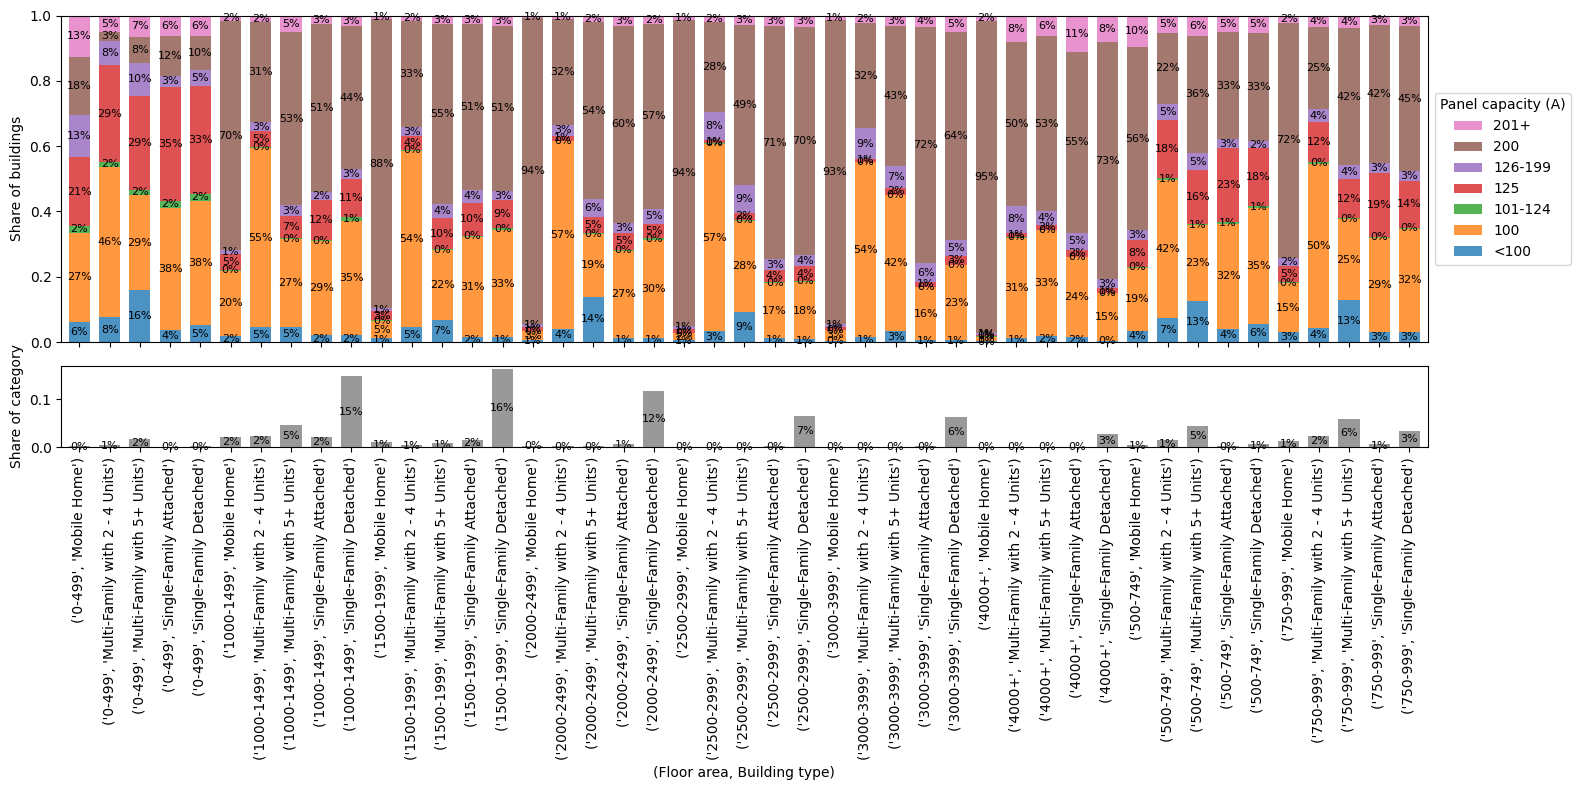

In [23]:
### alternative

gbc = ["build_existing_model.geometry_floor_area", "build_existing_model.geometry_building_type_recs"]
xlab = "(Floor area, Building type)"

dfi = dfm.groupby(gbc)[metric_cols].sum()
dfc = dfm.groupby(gbc)["building_id"].count()

dfi = dfi.divide(dfi.sum(axis=1), axis=0)
dfc = sort_index(dfc.divide(dfc.sum()))
dfi = sort_index(sort_index(dfi, axis=0), axis=1)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios': [4,1]}, figsize=(16,8))
dfi.plot(kind="bar", stacked=True,  alpha=0.8, width=0.7, ax=ax1)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), reverse=True, title="Panel capacity (A)")
ax1.set_ylim(0,1)
ax1.set_ylabel(f"Share of buildings")

for i, row in dfi.reset_index(drop=True).iterrows():
    for j in range(len(row)):
        ax1.text(i, row.iloc[0:j].sum()+row.iloc[j]/2, f"{row.iloc[j]*100:.0f}%", ha="center", va="center", fontsize=8)

dfc.plot(kind="bar", stacked=False, color="gray", alpha=0.8, width=0.7, ax=ax2)
ax2.set_xticks(ticks = range(len(dfc)), labels = format_labels(dfc.index))
ax2.set_xlabel(xlab)
ax2.set_ylabel("Share of category")

for j in range(len(dfc)):
    ax2.text(j, dfc.iloc[j]/2, f"{dfc.iloc[j]*100:.0f}%", ha="center", va="center", fontsize=8)

plt.tight_layout()

metric = f"label_proba_by_{xlab}"
fig.savefig(output_dir / f"3stacked_bar__{metric}.png", dpi=400, bbox_inches="tight")


### [2.1] plot probability of labels by one variable, subplot by Census Region

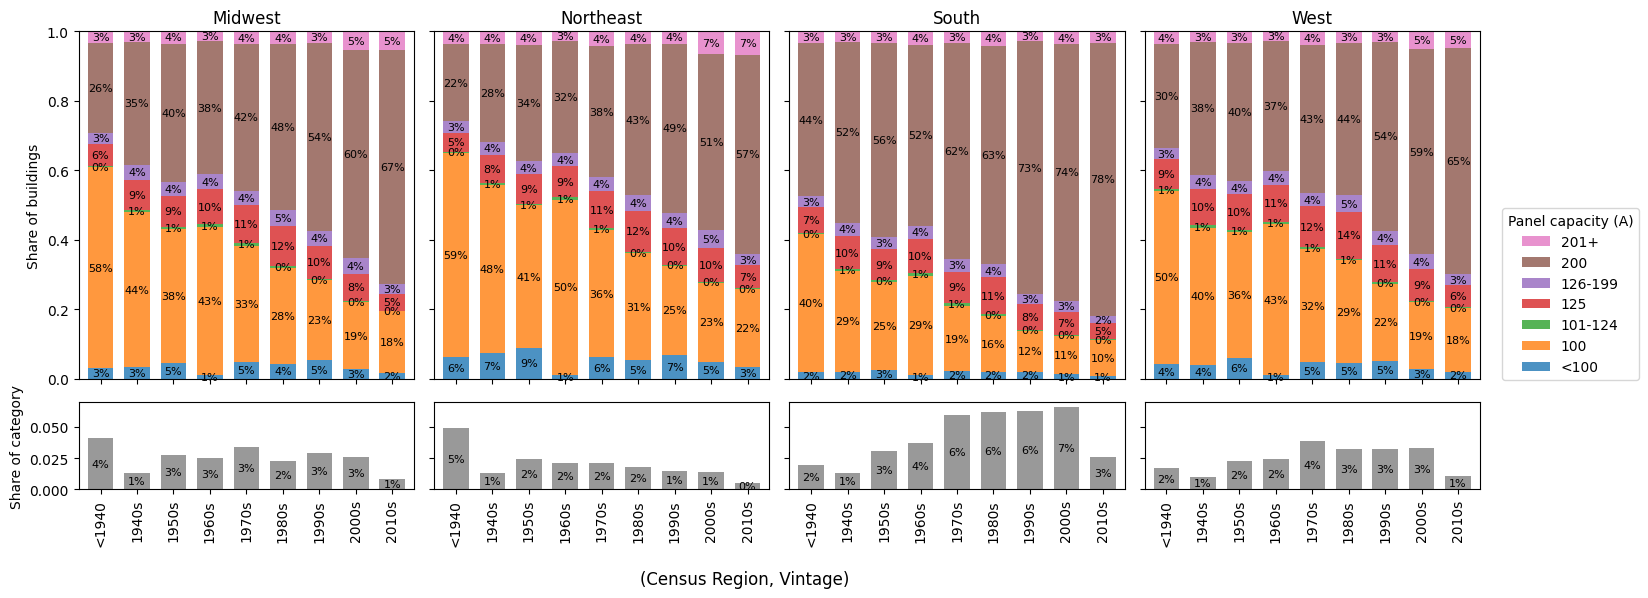

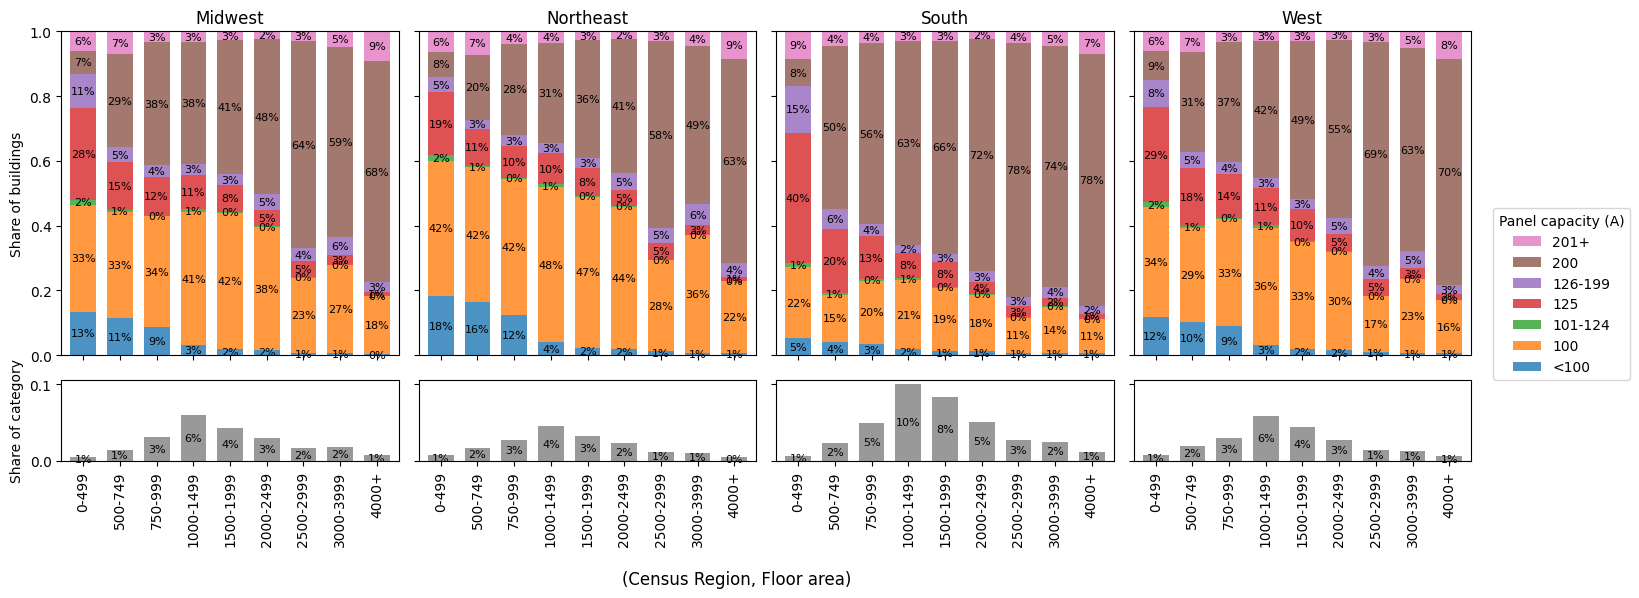

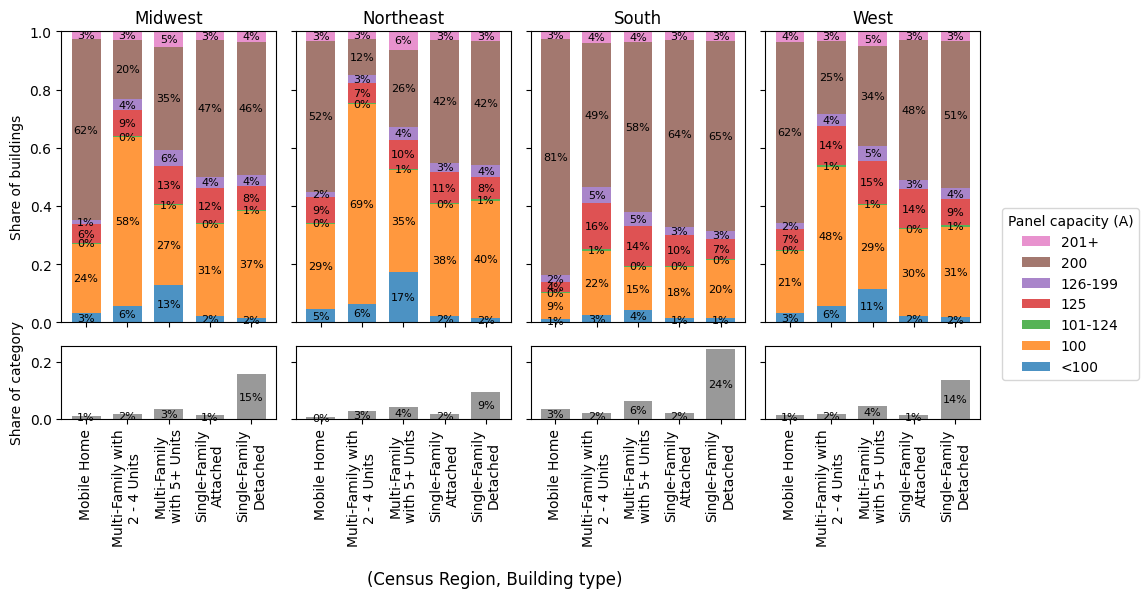

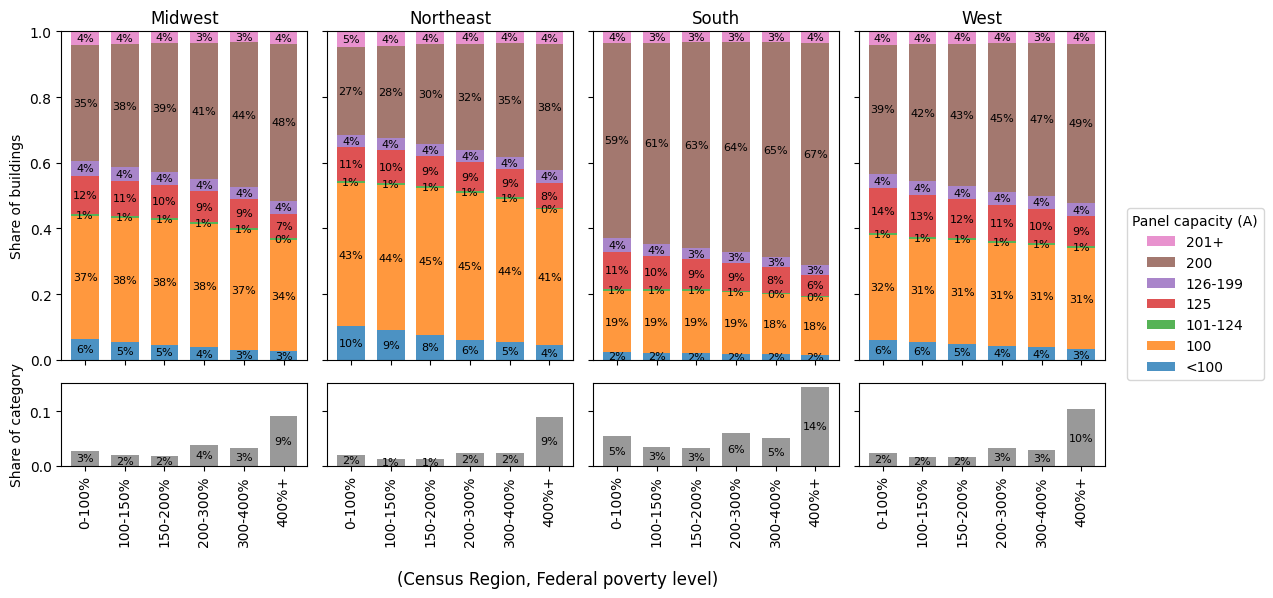

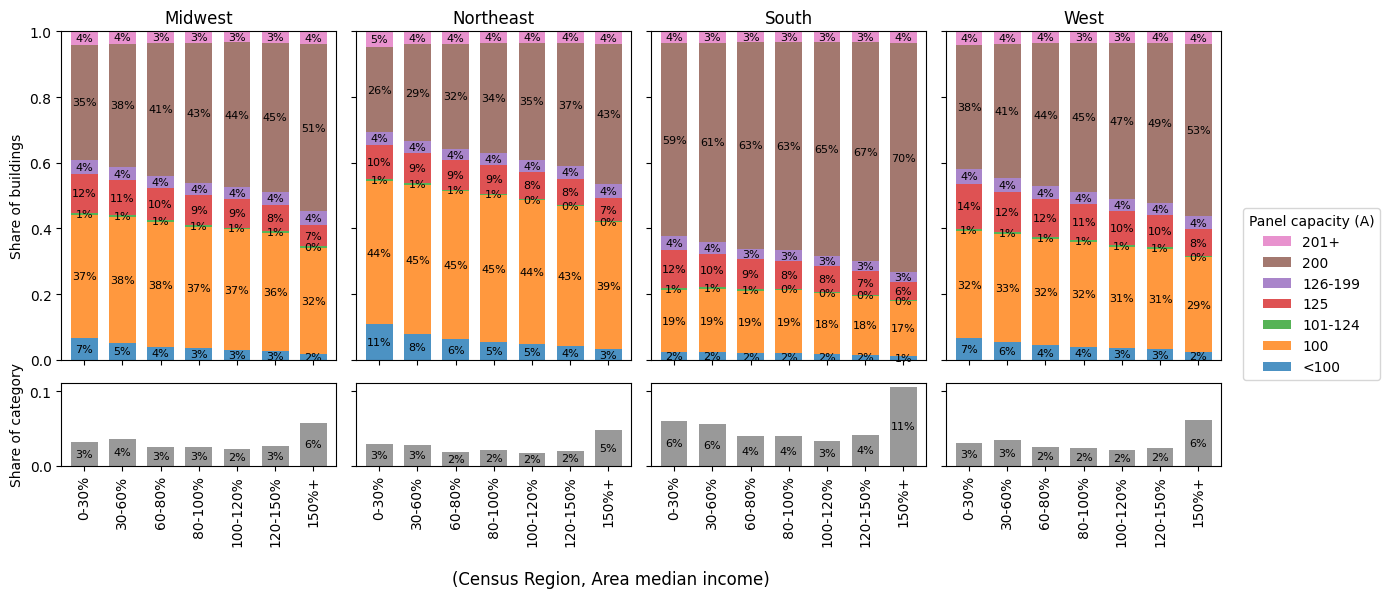

In [24]:
group_bys = [
    "build_existing_model.vintage",
    "build_existing_model.geometry_floor_area",
    "build_existing_model.geometry_building_type_recs",
    "build_existing_model.federal_poverty_level",
    "build_existing_model.area_median_income",
]
labels = [
    "Vintage",
    "Floor area",
    "Building type",
    "Federal poverty level",
    "Area median income",
]

for gbc, xlab in zip(group_bys, labels):
    xlab = f"(Census Region, {xlab})"
    
    dfi = dfm.groupby(["build_existing_model.census_region", gbc])[metric_cols].sum()
    dfc = dfm.groupby(["build_existing_model.census_region", gbc])["building_id"].count()
    
    dfi = dfi.divide(dfi.sum(axis=1), axis=0)
    dfc = sort_index(dfc.divide(dfc.sum()))
    dfi = sort_index(sort_index(dfi, axis=0), axis=1)
    
    fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey="row", gridspec_kw={'height_ratios': [4,1]}, 
                             figsize=(3.75+1.25*dfm[gbc].nunique(), 6))
    for k, reg in enumerate(sorted(dfi.index.get_level_values(level=0).unique())):
        ax1 = axes[0,k]
        dfii = sort_index(sort_index(dfi.loc[(reg)], axis=0), axis=1)
        dfii.plot(kind="bar", stacked=True,  alpha=0.8, width=0.7, ax=ax1, legend=False)
        # ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), reverse=True, title="Panel capacity (A)")
        ax1.set_ylim(0,1)
        ax1.set_ylabel(f"Share of buildings")
        ax1.set_title(reg)
        
        for i, row in dfii.reset_index(drop=True).iterrows():
            for j in range(len(row)):
                ax1.text(i, row.iloc[0:j].sum()+row.iloc[j]/2, f"{row.iloc[j]*100:.0f}%", ha="center", va="center", fontsize=8)
                
        ax2 = axes[1,k]
        dfcc = sort_index(dfc.loc[(reg)])
        dfcc.plot(kind="bar", stacked=False, color="gray", alpha=0.8, width=0.7, ax=ax2, legend=False)
        ax2.set_xticks(ticks = range(len(dfcc)), labels = format_labels(dfcc.index))
        ax2.set_xlabel(None)
        ax2.set_ylabel("Share of category")
        
        for j in range(len(dfcc)):
            ax2.text(j, dfcc.iloc[j]/2, f"{dfcc.iloc[j]*100:.0f}%", ha="center", va="center", fontsize=8)

    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(reversed(handles), reversed(labels), title="Panel capacity (A)", loc='center left', bbox_to_anchor=(1, 0.5))
    
    fig.supxlabel(xlab)
    plt.tight_layout()
    
    metric = f"label_proba_by_{xlab}"
    fig.savefig(output_dir / f"2stacked_bar__{metric}.png", dpi=400, bbox_inches="tight")

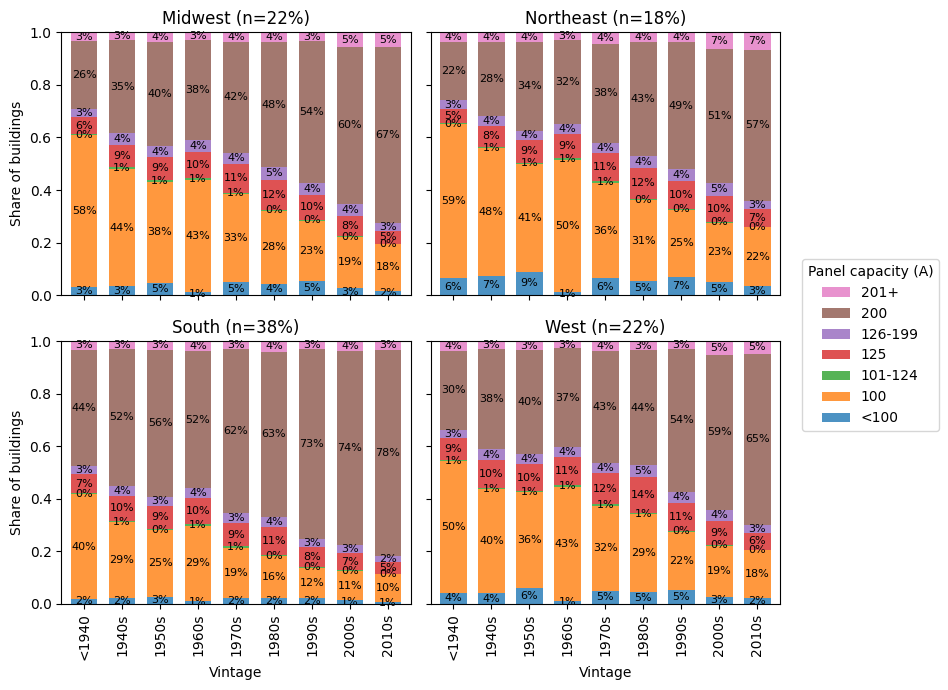

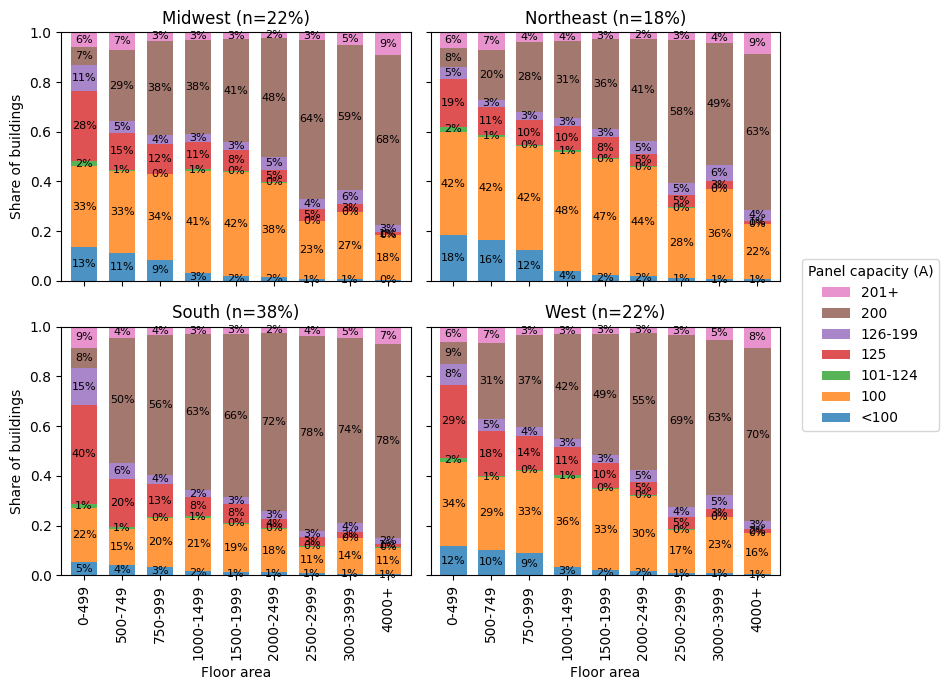

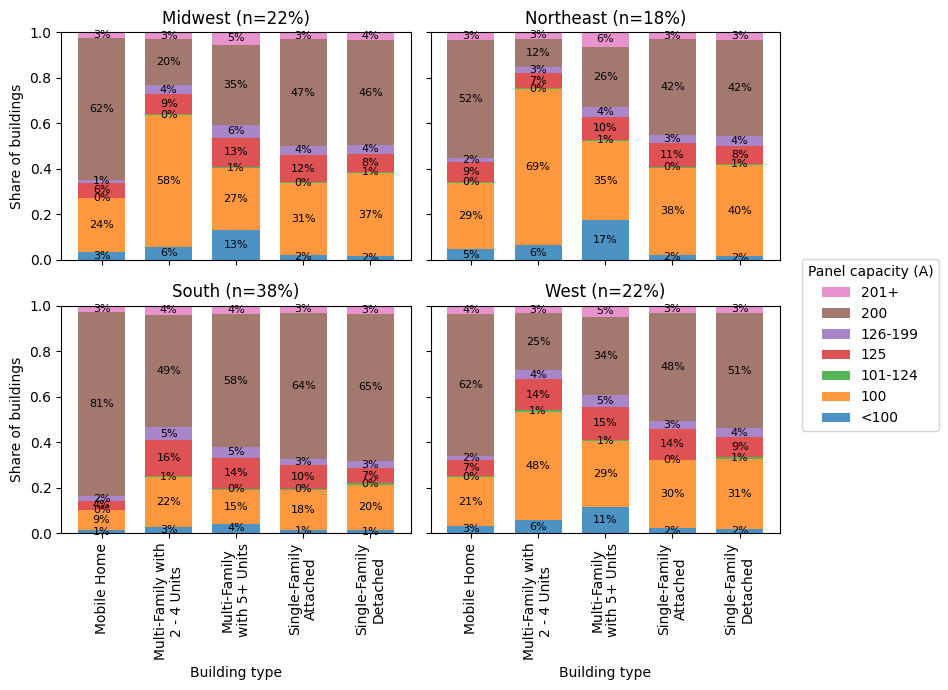

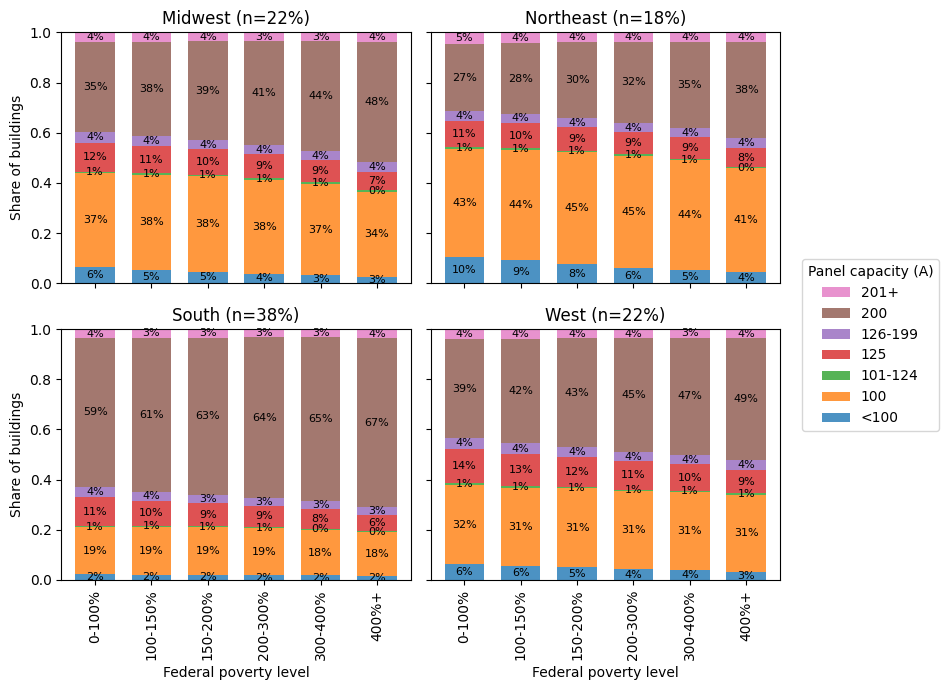

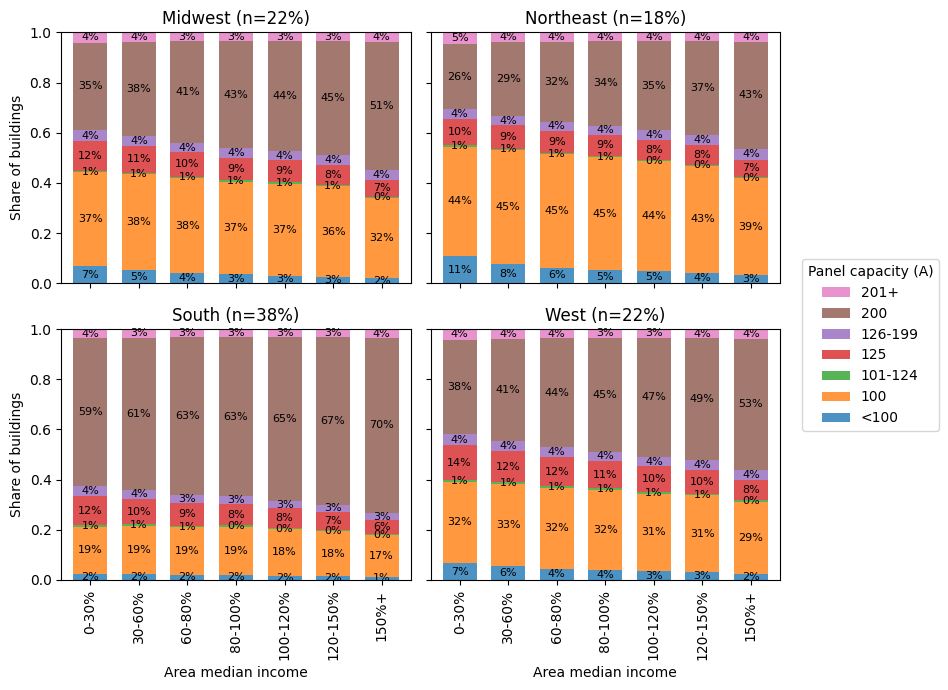

In [25]:
group_bys = [
    "build_existing_model.vintage",
    "build_existing_model.geometry_floor_area",
    "build_existing_model.geometry_building_type_recs",
    "build_existing_model.federal_poverty_level",
    "build_existing_model.area_median_income",
]
labels = [
    "Vintage",
    "Floor area",
    "Building type",
    "Federal poverty level",
    "Area median income",
]

for group_by, xlab in zip(group_bys, labels):
    subplot_by = "build_existing_model.census_region" # fixed - for # of axes and fig output name
    dfi = dfm.groupby([subplot_by, group_by])[metric_cols].sum()
    
    dfi = dfi.divide(dfi.sum(axis=1), axis=0)
    dfi = sort_index(sort_index(dfi, axis=0), axis=1)
    dfi = dfi.unstack(level=0)
    dfi = dfi.swaplevel(i=-2, j=-1, axis=1).sort_index(axis=1)
    
    # get count of subplot_by
    dfc = dfm.groupby(subplot_by)["building_id"].count()
    dfc = dfc/dfc.sum()
    
    fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,7))
    
    for k, reg in enumerate(dfi.columns.get_level_values(level=0).unique()):
        dfii = dfi.iloc[:, dfi.columns.get_level_values(level=0)==reg][reg]
        dfii = sort_index(sort_index(dfii, axis=0), axis=1)
    
        ax = axes[k //2,  k % 2]
        dfii.plot(kind="bar", stacked=True,  alpha=0.8, width=0.7, ax=ax, legend=False)
        ax.set_ylim(0,1)
        ax.set_ylabel(f"Share of buildings")
        ax.set_xlabel(xlab)
        ax.set_xticks(ticks = range(len(dfii)), labels = format_labels(dfii.index))
        ax.set_title(f"{reg} (n={dfc[reg]*100:.0f}%)")
        
        for i, row in dfii.reset_index(drop=True).iterrows():
            for j in range(len(row)):
                ax.text(i, row.iloc[0:j].sum()+row.iloc[j]/2, f"{row.iloc[j]*100:.0f}%", ha="center", va="center", fontsize=8)
    
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(reversed(handles), reversed(labels), title="Panel capacity (A)", loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()

    metric = f"label_proba_by_{xlab}_subplot_by_census_region"
    fig.savefig(output_dir / f"1stacked_bar__{metric}.png", dpi=400, bbox_inches="tight")
    dfi.to_csv(output_dir / f"data__1stacked_bar__{metric}.csv", index=True)

### [3] plot rep value prediction vs. NEC

In [26]:
def bin_panel_cap_headroom(df_column):
    # 10A single heating element heater
    # 5kVA ~ 20A (dryer)
    # 7.2kVA ~ 30A (EVSE)
    # 12kVA ~ 50A (cooking)

    try:
        df_column = df_column.astype(float)
    except ValueError as e:
        df_column = df_column.replace('', np.nan).astype(float)

    df_out = pd.Series(np.nan, index=df_column.index)
    df_out.loc[df_column<=0] = "0A"
    df_out.loc[(df_column>0) & (df_column<10)] = "1-9A"
    df_out.loc[(df_column>=10) & (df_column<20)] = "10-19A"
    df_out.loc[(df_column>=20) & (df_column<30)] = "20-29A"
    df_out.loc[(df_column>=30) & (df_column<50)] = "30-49A"
    df_out.loc[(df_column>=50)] = "50+A"

    categories = ["0A", "1-9A", "10-19A", "20-29A", "30-49A", "50+A"]
    df_out = pd.Categorical(df_out, ordered=True, categories=categories)

    assert df_out.isna().sum() == 0, f"{df_out.isna().sum()} NA values after binning panel capacity headroom"

    return df_out

In [27]:
### combine prediction with NEC calc
print(f"Using {method} for representative value of panel amperage...")
df = dfn.join(
    dfm.set_index("building_id")[["predicted_panel_amp_bin", "predicted_panel_amp"]],
    on="building_id"
)
df["headroom_amp_220_83"] = df["predicted_panel_amp"] - df["amp_total_pre_upgrade_A_220_83"]
df["headroom_amp_220_87"] = df["predicted_panel_amp"] - df["amp_total_pre_upgrade_A_220_87"]
df["headroom_pct_220_83"] = (df["headroom_amp_220_83"] / df["predicted_panel_amp"])*100
df["headroom_pct_220_87"] = (df["headroom_amp_220_87"] / df["predicted_panel_amp"])*100

df["headroom_amp_bin_220_83"] = bin_panel_cap_headroom(df["headroom_amp_220_83"])
df["headroom_amp_bin_220_87"] = bin_panel_cap_headroom(df["headroom_amp_220_87"])
df

Using lookup for representative value of panel amperage...


,building_id,job_id,started_at,completed_at,completed_status,apply_upgrade.applicable,apply_upgrade.upgrade_name,apply_upgrade.reference_scenario,build_existing_model.ahs_region,build_existing_model.aiannh_area,...,amp_total_pre_upgrade_A_220_87,has_garbage_disposal,predicted_panel_amp_bin,predicted_panel_amp,headroom_amp_220_83,headroom_amp_220_87,headroom_pct_220_83,headroom_pct_220_87,headroom_amp_bin_220_83,headroom_amp_bin_220_87
0,1,181,2024-08-15 13:45:49,2024-08-15 13:46:10,Success,<NA>,<NA>,,Non-CBSA East South Central,Yes,...,72.444792,False,200,200,108.899110,127.555208,54.449555,63.777604,50+A,50+A
1,2,262,2024-08-16 13:33:53,2024-08-16 13:34:13,Success,<NA>,<NA>,,Non-CBSA New England,No,...,19.855729,True,<100,60,11.908891,40.144271,19.848152,66.907118,10-19A,30-49A
2,3,262,2024-08-16 14:17:45,2024-08-16 14:18:08,Success,<NA>,<NA>,,"CBSA Boston-Cambridge-Newton, MA-NH",No,...,28.154688,True,100,100,43.509700,71.845313,43.509700,71.845313,30-49A,50+A
3,4,102,2024-08-15 06:32:40,2024-08-15 06:32:59,Success,<NA>,<NA>,,Non-CBSA West South Central,No,...,30.481250,True,200,200,136.654365,169.518750,68.327183,84.759375,50+A,50+A
4,5,28,2024-08-14 17:54:32,2024-08-14 17:54:56,Success,<NA>,<NA>,,"CBSA Riverside-San Bernardino-Ontario, CA",No,...,21.704687,True,200,200,160.569941,178.295312,80.284971,89.147656,50+A,50+A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483058,549995,288,2024-08-15 18:34:05,2024-08-15 18:34:36,Success,<NA>,<NA>,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",No,...,40.365625,False,200,200,151.240489,159.634375,75.620245,79.817188,50+A,50+A
483059,549996,201,2024-08-16 08:01:45,2024-08-16 08:02:16,Success,<NA>,<NA>,,Non-CBSA South Atlantic,No,...,73.122917,False,200,200,106.060305,126.877083,53.030152,63.438542,50+A,50+A
483060,549997,267,2024-08-16 14:10:45,2024-08-16 14:11:13,Success,<NA>,<NA>,,Non-CBSA Middle Atlantic,No,...,56.589583,False,100,100,26.714323,43.410417,26.714323,43.410417,20-29A,30-49A
483061,549998,129,2024-08-15 08:33:08,2024-08-15 08:33:35,Success,<NA>,<NA>,,"CBSA Los Angeles-Long Beach-Anaheim, CA",No,...,26.745313,True,100,100,27.990289,73.254688,27.990289,73.254688,20-29A,50+A


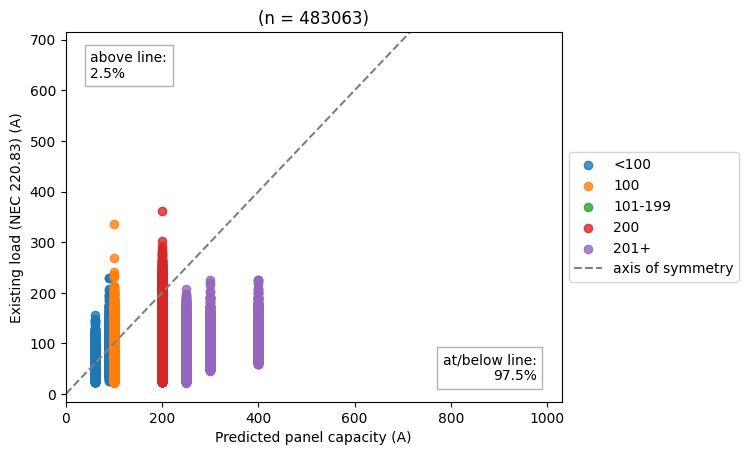

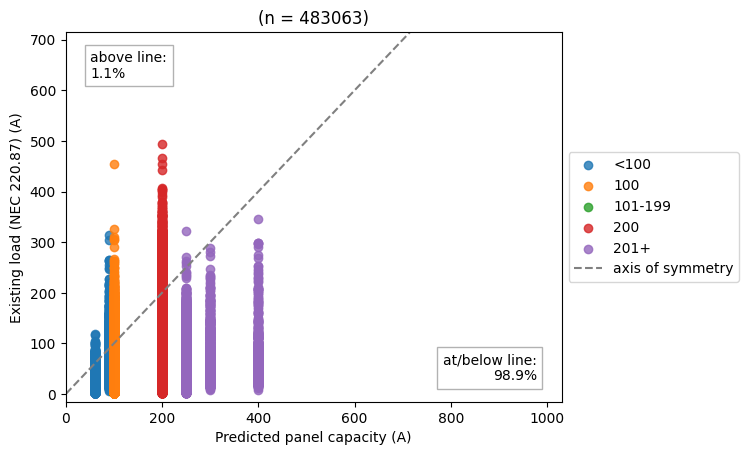

In [28]:
# scatter plots
y_metrics = [
    "amp_total_pre_upgrade_A_220_83",
    "amp_total_pre_upgrade_A_220_87",
]

y_labels = [
    "Existing load (NEC 220.83) (A)",
    "Existing load (NEC 220.87) (A)",
]

for y_metric, y_label in zip(y_metrics, y_labels):
    x_metric = "predicted_panel_amp"
    x_label = "Predicted panel capacity (A)"
    
    title = None
    dfp = df[[x_metric, y_metric, "predicted_panel_amp_bin"]].dropna(how="any")
    assert dfp[x_metric].dtype == int, f"{x_metric=} is of type {dfp[x_metric].dtype=}"
    assert dfp[y_metric].dtype == float, f"{y_metric=} is of type {dfp[y_metric].dtype=}"
    
    fig, ax = plt.subplots()
    for bin, color in zip(
        ["<100", "100", "101-199", "200", "201+"],
        ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'],
    ):
        x = dfp.loc[dfp["predicted_panel_amp_bin"]==bin, x_metric]
        y = dfp.loc[dfp["predicted_panel_amp_bin"]==bin, y_metric]
        ax.scatter(x, y, label=bin, c=color, alpha=0.8)
        
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xlim(0, 1030)
    ax.set_ylim(-15, 715)
    ax.margins(x=0, y=0)
    
    lxy = np.array([
        min(ax.get_xlim()[0], ax.get_ylim()[0]), 
        max(ax.get_xlim()[1], ax.get_ylim()[1]), 
        ])
    ax.plot(lxy, lxy, label="axis of symmetry", ls="--", c="gray")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # calculate % above and at or below x=y
    frac = dfp[y_metric]/dfp[x_metric]
    frac_above = len(frac[frac>1]) / len(frac)
    frac_at_below = 1-frac_above
    ax.text(0.05, 0.95, f"above line:\n{frac_above*100:.1f}%", ha="left", va="top", transform=ax.transAxes, 
            bbox=dict(facecolor='w', alpha=0.3))
    ax.text(0.95, 0.05, f"at/below line:\n{frac_at_below*100:.1f}%", ha="right", va="bottom", transform=ax.transAxes, 
            bbox=dict(facecolor='w', alpha=0.3))
    
    title_ext = f"(n = {len(dfp)})"
    if title is not None:
        title += f" {title_ext}"
    else:
        title = title_ext
    ax.set_title(title)
    if output_dir is not None:
        fig.savefig(output_dir / f"scatter__{y_metric}_by_{x_metric}_{method}.png", dpi=400, bbox_inches="tight")

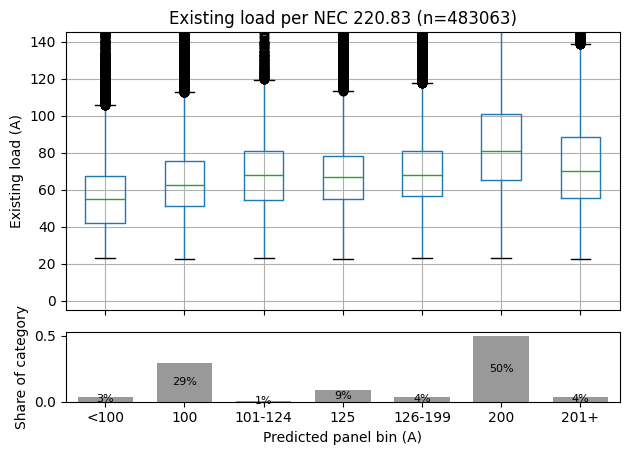

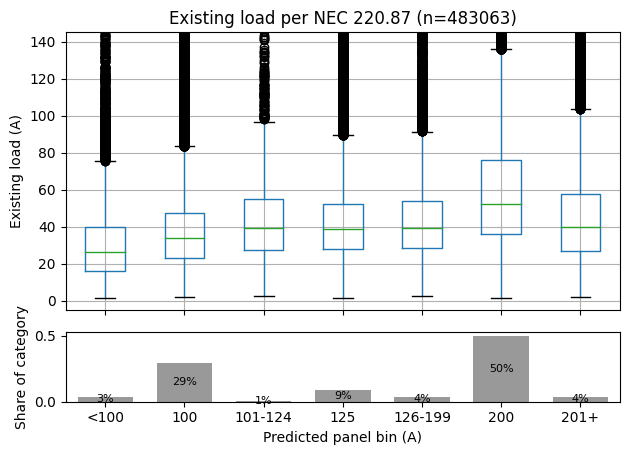

In [29]:
# box plots -- existing load
for panel_metric in [
    "amp_total_pre_upgrade_A_220_83", 
    "amp_total_pre_upgrade_A_220_87"
]:
    
    by_var = "predicted_panel_amp_bin"
    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios': [4,1]})
    df[[by_var, panel_metric]].boxplot(by=by_var, ax=ax1, showfliers=True)
    ax1.set_ylabel("Existing load (A)")
    ax1.set_ylim(-5,145) # adjust ylim by looking at natural ylim with showfliers=False in .boxplot()
    if "83" in panel_metric:
        ax1.set_title(f"Existing load per NEC 220.83 (n={len(df)})")
    else:
        ax1.set_title(f"Existing load per NEC 220.87 (n={len(df)})")
    
    dfc = sort_index(df[by_var].value_counts()) / len(df)
    pd.concat([
        pd.Series(0, index=[""]),
        dfc], axis=0).plot(kind="bar", stacked=False, color="gray", alpha=0.8, width=0.7, ax=ax2)
    ax2.set_xlim(0.5,len(dfc)+0.5)
    ax2.set_xticks(ticks = range(1, len(dfc)+1), labels = format_labels(dfc.index), rotation=0)
    
    ax2.set_xlabel("Predicted panel bin (A)")
    ax2.set_ylabel("Share of category")
    
    for j in range(len(dfc)):
        ax2.text(j+1, dfc.iloc[j]/2, f"{dfc.iloc[j]*100:.0f}%", ha="center", va="center", fontsize=8)
    
    fig_file = f"box__{panel_metric}_by_{by_var}.png"
    if output_dir is not None:
        fig_file = output_dir / fig_file
    
    plt.suptitle(None)
    plt.tight_layout()
    fig.savefig(fig_file, dpi=400, bbox_inches="tight")

In [30]:
panel_labels = metric_cols
existing_load_methods = ["amp_total_pre_upgrade_A_220_83", "amp_total_pre_upgrade_A_220_87"]

for mtd in existing_load_methods:
    print(f"\nUsing {mtd} to calculate existing load:")
    
    for label in panel_labels:        
        cond = df["predicted_panel_amp_bin"].isin([label]) 
        
        loads = df.loc[cond, mtd]
        upper = np.percentile(loads, 75) + 1.5*(np.percentile(loads, 75) - np.percentile(loads, 25))
        lower = np.percentile(loads, 25) - 1.5*(np.percentile(loads, 75) - np.percentile(loads, 25))
        cond_outliers = cond & ((df[mtd]<lower) | (df[mtd]>upper))
        n_outliers = len(df.loc[cond_outliers])
        pct_outliers = n_outliers / len(loads) * 100
        
        print(f"For label: {label}...")
        print(f" - outliers: {n_outliers} ( {pct_outliers:.02f} % ) ")
        
        cond_err = cond & (df["predicted_panel_amp"]<df[mtd])
        n_err = len(df.loc[cond_err])
        pct_err = n_err / len(loads) * 100
        print(f" - homes where existing load > panel amp: {n_err} ( {pct_err:.02f} % ) ")
        print(f" - homes where existing load =< panel amp (with no or some headroom): {len(loads) - n_err} ( {(100-pct_err):.02f} % ) ")


Using amp_total_pre_upgrade_A_220_83 to calculate existing load:
For label: <100...
 - outliers: 487 ( 2.90 % ) 
 - homes where existing load > panel amp: 5387 ( 32.04 % ) 
 - homes where existing load =< panel amp (with no or some headroom): 11425 ( 67.96 % ) 
For label: 100...
 - outliers: 2444 ( 1.72 % ) 
 - homes where existing load > panel amp: 5444 ( 3.84 % ) 
 - homes where existing load =< panel amp (with no or some headroom): 136489 ( 96.16 % ) 
For label: 101-124...
 - outliers: 100 ( 3.97 % ) 
 - homes where existing load > panel amp: 96 ( 3.82 % ) 
 - homes where existing load =< panel amp (with no or some headroom): 2420 ( 96.18 % ) 
For label: 125...
 - outliers: 1423 ( 3.26 % ) 
 - homes where existing load > panel amp: 746 ( 1.71 % ) 
 - homes where existing load =< panel amp (with no or some headroom): 42870 ( 98.29 % ) 
For label: 126-199...
 - outliers: 642 ( 3.55 % ) 
 - homes where existing load > panel amp: 126 ( 0.70 % ) 
 - homes where existing load =< panel am

In [31]:
print("Total error from 83 (Load Summing), Error if existing load is > predicted panel size:")
# error:= "predicted_panel_amp_bin" > "amp_total_pre_upgrade_A_220_83"
cond = df["predicted_panel_amp"]<df["amp_total_pre_upgrade_A_220_83"]
df_error = df.loc[cond]

print(f"# of samples: {len(df_error)}")
print(f"% of samples: {len(df_error) / len(df)}")

###
print("\nTotal error from 87 (Max Demand), Error if existing load is > predicted panel size:")
# error:= "predicted_panel_amp_bin" > "amp_total_pre_upgrade_A_220_87"
cond = df["predicted_panel_amp"]<df["amp_total_pre_upgrade_A_220_87"]
df_error = df.loc[cond]

print(f"# of samples: {len(df_error)}")
print(f"% of samples: {len(df_error) / len(df)}")

Total error from 83 (Load Summing), Error if existing load is > predicted panel size:
# of samples: 12195
% of samples: 0.02524515435874824

Total error from 87 (Max Demand), Error if existing load is > predicted panel size:
# of samples: 5476
% of samples: 0.011335995511972558


In [32]:
# How much is existing load by NEC 220.87 lower than 220.83:
((df["amp_total_pre_upgrade_A_220_87"]-df["amp_total_pre_upgrade_A_220_83"])/df["amp_total_pre_upgrade_A_220_83"]).describe()

count    483063.000000
mean         -0.367427
std           0.246919
min          -0.939504
25%          -0.533815
50%          -0.408308
75%          -0.233038
max           4.023094
dtype: float64

In [33]:
# How much is more headroom is calculated by NEC 220.87 than 220.83:
(df["headroom_amp_220_87"]-df["headroom_amp_220_83"]).describe()

count    483063.000000
mean         25.154447
std          19.818129
min        -320.823308
25%          16.759937
50%          26.591738
75%          36.093582
max         165.319327
dtype: float64

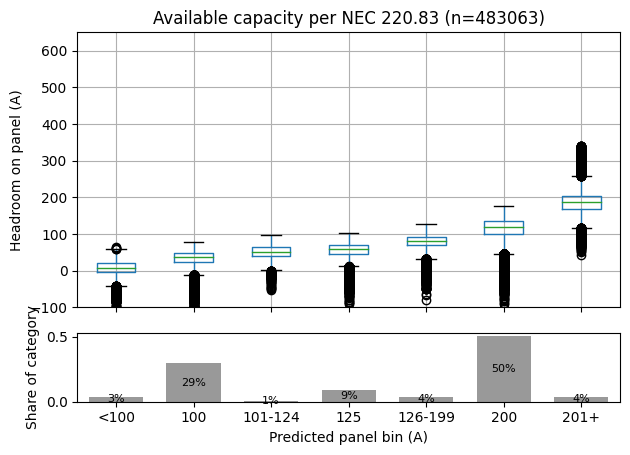

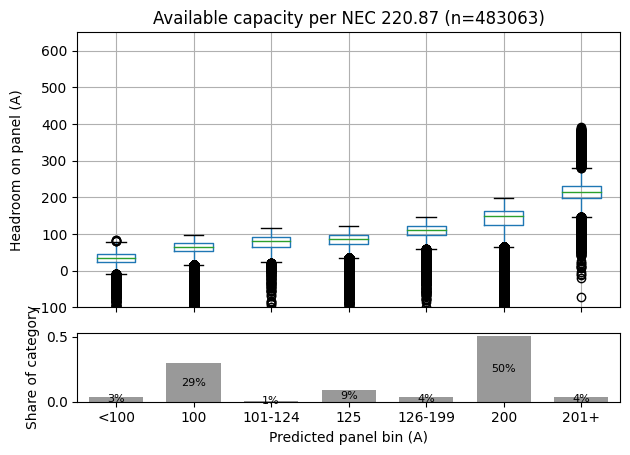

In [34]:
# box plots -- Head room abs
for panel_metric in [
    "headroom_amp_220_83", 
    "headroom_amp_220_87"
]:
    
    by_var = "predicted_panel_amp_bin"
    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios': [4,1]})
    df[[by_var, panel_metric]].boxplot(by=by_var, ax=ax1, showfliers=True)
    ax1.set_ylabel("Headroom on panel (A)")
    ax1.set_ylim(-100, 650) # adjust ylim by looking at natural ylim with showfliers=False in .boxplot()
    if "83" in panel_metric:
        ax1.set_title(f"Available capacity per NEC 220.83 (n={len(df)})")
    else:
        ax1.set_title(f"Available capacity per NEC 220.87 (n={len(df)})")
    
    dfc = sort_index(df[by_var].value_counts()) / len(df)
    pd.concat([
        pd.Series(0, index=[""]),
        dfc], axis=0).plot(kind="bar", stacked=False, color="gray", alpha=0.8, width=0.7, ax=ax2)
    ax2.set_xlim(0.5,len(dfc)+0.5)
    ax2.set_xticks(ticks = range(1, len(dfc)+1), labels = format_labels(dfc.index), rotation=0)
    
    ax2.set_xlabel("Predicted panel bin (A)")
    ax2.set_ylabel("Share of category")
    
    for j in range(len(dfc)):
        ax2.text(j+1, dfc.iloc[j]/2, f"{dfc.iloc[j]*100:.0f}%", ha="center", va="center", fontsize=8)
    
    fig_file = f"box__{panel_metric}_by_{by_var}.png"
    if output_dir is not None:
        fig_file = output_dir / fig_file
    
    plt.suptitle(None)
    plt.tight_layout()
    fig.savefig(fig_file, dpi=400, bbox_inches="tight")

In [35]:
# tabulate fractions of homes by binned cap headroom
existing_load_methods = ["headroom_amp_bin_220_83", "headroom_amp_bin_220_87"]
for mtd in existing_load_methods:
    groupby_cols = ["predicted_panel_amp_bin", mtd]
    dfi = df.groupby(groupby_cols)["building_id"].count().unstack().div(df.groupby(["predicted_panel_amp_bin"])["building_id"].count(), axis=0)
    display((dfi*100).round(1))
    dfi.to_csv(output_dir / f"data__fraction_homes__{mtd}.csv", index=True)

headroom_amp_bin_220_83,0A,1-9A,10-19A,20-29A,30-49A,50+A
predicted_panel_amp_bin,,,,,,
<100,32.0,26.7,15.2,21.4,4.5,0.2
100,3.8,4.1,10.4,17.7,41.1,22.9
101-124,3.8,2.6,3.2,5.7,31.0,53.7
125,1.7,1.3,2.2,3.7,22.8,68.3
126-199,0.7,0.5,0.9,1.1,5.4,91.4
200,0.2,0.1,0.2,0.4,1.7,97.4
201+,0.0,0.0,0.0,0.0,0.0,100.0


headroom_amp_bin_220_87,0A,1-9A,10-19A,20-29A,30-49A,50+A
predicted_panel_amp_bin,,,,,,
<100,4.8,5.1,9.6,16.5,49.2,14.8
100,1.3,0.7,1.2,2.5,15.6,78.7
101-124,2.6,1.1,1.1,1.9,7.4,85.9
125,1.3,0.6,0.7,1.0,4.3,92.0
126-199,0.9,0.3,0.4,0.5,1.7,96.1
200,0.8,0.3,0.3,0.4,1.4,96.8
201+,0.0,0.0,0.0,0.0,0.1,99.9


In [36]:
panel_labels = metric_cols
existing_load_methods = ["headroom_amp_220_83", "headroom_amp_220_87"]

for mtd in existing_load_methods:
    print(f"\nUsing {mtd} to calculate existing load:")

    table = []
    for label in panel_labels:        
        cond = df["predicted_panel_amp_bin"].isin([label]) 
        
        loads = df.loc[cond, mtd]
        upper = np.percentile(loads, 75) + 1.5*(np.percentile(loads, 75) - np.percentile(loads, 25))
        lower = np.percentile(loads, 25) - 1.5*(np.percentile(loads, 75) - np.percentile(loads, 25))
        cond_outliers = cond & ((df[mtd]<lower) | (df[mtd]>upper))
        n_outliers = len(df.loc[cond_outliers])
        pct_outliers = n_outliers / len(loads) * 100
        
        print(f"For label: {label}...")
        print(f" - outliers: {n_outliers} ( {pct_outliers:.02f} % ) ")
    


Using headroom_amp_220_83 to calculate existing load:
For label: <100...
 - outliers: 190 ( 1.13 % ) 
For label: 100...
 - outliers: 2444 ( 1.72 % ) 
For label: 101-124...
 - outliers: 100 ( 3.97 % ) 
For label: 125...
 - outliers: 1423 ( 3.26 % ) 
For label: 126-199...
 - outliers: 642 ( 3.55 % ) 
For label: 200...
 - outliers: 5122 ( 2.11 % ) 
For label: 201+...
 - outliers: 1465 ( 8.35 % ) 

Using headroom_amp_220_87 to calculate existing load:
For label: <100...
 - outliers: 464 ( 2.76 % ) 
For label: 100...
 - outliers: 3763 ( 2.65 % ) 
For label: 101-124...
 - outliers: 131 ( 5.21 % ) 
For label: 125...
 - outliers: 1935 ( 4.44 % ) 
For label: 126-199...
 - outliers: 887 ( 4.91 % ) 
For label: 200...
 - outliers: 11560 ( 4.77 % ) 
For label: 201+...
 - outliers: 1949 ( 11.11 % ) 


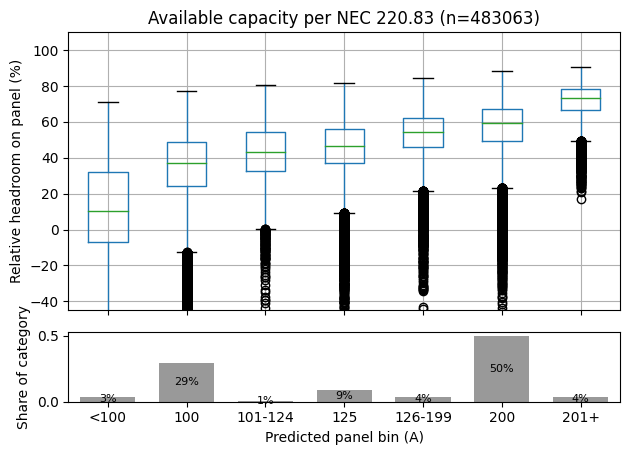

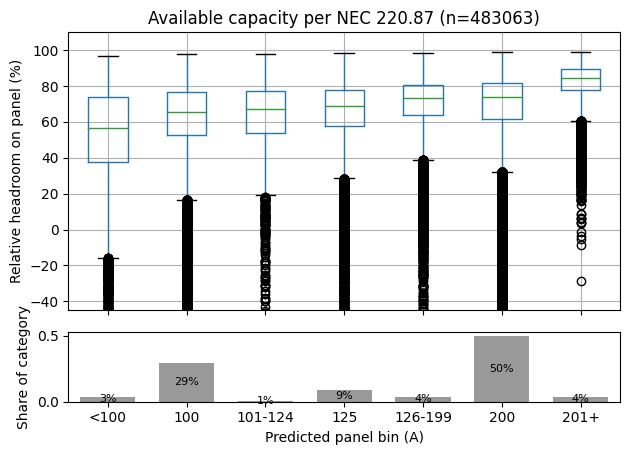

In [37]:
# box plots -- Head room %
for panel_metric in [
    "headroom_pct_220_83", 
    "headroom_pct_220_87"
]:
    
    by_var = "predicted_panel_amp_bin"
    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios': [4,1]})
    df[[by_var, panel_metric]].boxplot(by=by_var, ax=ax1, showfliers=True)
    ax1.set_ylabel("Relative headroom on panel (%)")
    ax1.set_ylim(-45, 110) # adjust ylim by looking at natural ylim with showfliers=False in .boxplot()
    if "83" in panel_metric:
        ax1.set_title(f"Available capacity per NEC 220.83 (n={len(df)})")
    else:
        ax1.set_title(f"Available capacity per NEC 220.87 (n={len(df)})")
    
    dfc = sort_index(df[by_var].value_counts()) / len(df)
    pd.concat([
        pd.Series(0, index=[""]),
        dfc], axis=0).plot(kind="bar", stacked=False, color="gray", alpha=0.8, width=0.7, ax=ax2)
    ax2.set_xlim(0.5,len(dfc)+0.5)
    ax2.set_xticks(ticks = range(1, len(dfc)+1), labels = format_labels(dfc.index), rotation=0)
    
    ax2.set_xlabel("Predicted panel bin (A)")
    ax2.set_ylabel("Share of category")
    
    for j in range(len(dfc)):
        ax2.text(j+1, dfc.iloc[j]/2, f"{dfc.iloc[j]*100:.0f}%", ha="center", va="center", fontsize=8)
    
    fig_file = f"box__{panel_metric}_by_{by_var}.png"
    if output_dir is not None:
        fig_file = output_dir / fig_file
    
    plt.suptitle(None)
    plt.tight_layout()
    fig.savefig(fig_file, dpi=400, bbox_inches="tight")

,total load,saturation
load_hvac,3.809922e+09,0.967377
load_water_heater,1.062898e+09,0.406829
load_dryer,1.849766e+09,0.664799
load_range_oven,3.602700e+09,0.621503
load_hot_tub_spa,1.687200e+07,0.034927
load_pool_heater,9.293400e+07,0.007125
load_evse,0.000000e+00,0.000000
load_lighting,2.689489e+09,1.000000
load_kitchen,1.449189e+09,1.000000
load_laundry,7.245945e+08,1.000000


<Axes: ylabel='total load'>

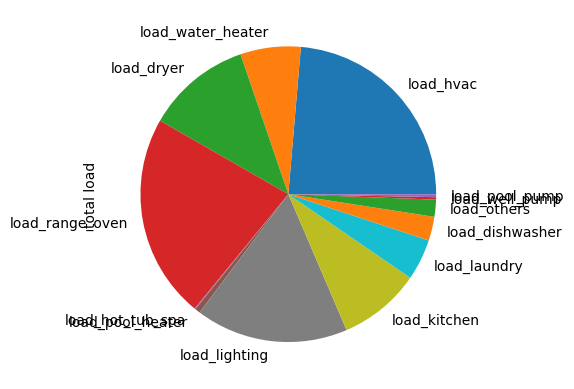

In [61]:
# Oveall end use loads as % of panel capacity
loads = [x for x in dfn.columns if x.startswith("load_") and "total" not in x]
df_loads = pd.concat([dfn[loads].sum().rename("total load"), ((dfn[loads]>0).sum()/len(dfn)).rename("saturation")], axis=1)
display(df_loads)
df_loads["total load"].plot(kind="pie")

<Axes: ylabel='average load'>

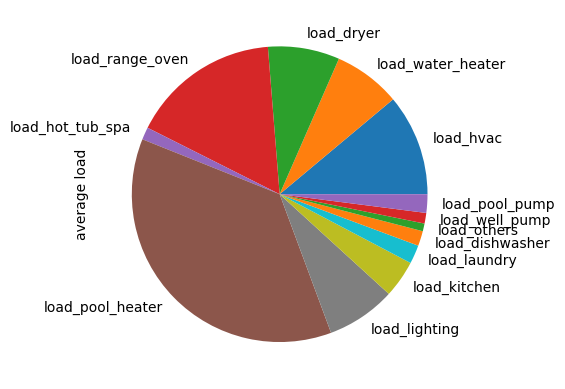

In [177]:
df_loads["average load"] = (df_loads["total load"] / (df_loads["saturation"]*len(dfn))).fillna(0)
df_loads
df_loads["average load"].plot(kind="pie")

In [193]:
major_loads = [
 'load_hvac',
 'load_water_heater',
 'load_dryer',
 'load_range_oven',
 'load_hot_tub_spa',
 'load_pool_heater',
 'load_evse',
#  'load_lighting',
#  'load_kitchen',
#  'load_laundry',
#  'load_washer',
#  'load_dishwasher',
#  'load_others',
#  'load_well_pump',
#  'load_pool_pump'
 ]
dfm["major_electric_loads"] = (df[major_loads]>0).sum(axis=1)


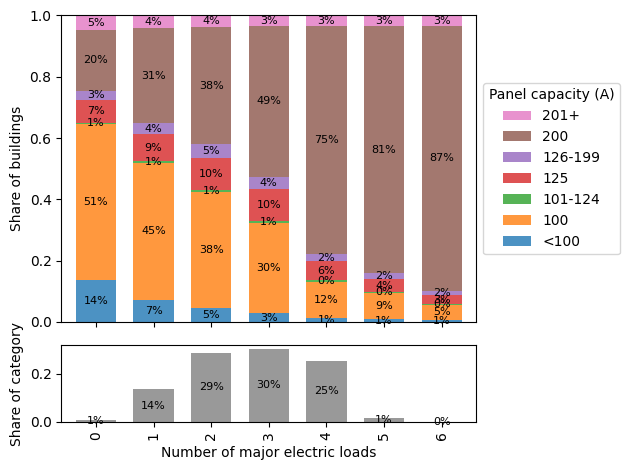

In [203]:
groupby_cols = [
    "major_electric_loads",
]
x_labels = [
    "Number of major electric loads",
]

for gbc, xlab in zip(groupby_cols, x_labels):
    dfi = dfm.groupby(gbc)[metric_cols].sum()
    dfc = dfm.groupby(gbc)["building_id"].count()
    
    dfi = dfi.divide(dfi.sum(axis=1), axis=0)
    dfi = sort_index(sort_index(dfi, axis=0), axis=1)
    dfc = sort_index(dfc.divide(dfc.sum()))
    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios': [4,1]})
    dfi.plot(kind="bar", stacked=True,  alpha=0.8, width=0.7, ax=ax1)
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), reverse=True, title="Panel capacity (A)")
    ax1.set_ylim(0,1)
    ax1.set_ylabel(f"Share of buildings")

    for i, row in dfi.reset_index(drop=True).iterrows():
        for j in range(len(row)):
            ax1.text(i, row.iloc[0:j].sum()+row.iloc[j]/2, f"{row.iloc[j]*100:.0f}%", ha="center", va="center", fontsize=8)

    dfc.plot(kind="bar", stacked=False, color="gray", alpha=0.8, width=0.7, ax=ax2)
    ax2.set_xticks(ticks = range(len(dfc)), labels = format_labels(dfc.index))
    ax2.set_xlabel(xlab)
    ax2.set_ylabel("Share of category")

    for j in range(len(dfc)):
        ax2.text(j, dfc.iloc[j]/2, f"{dfc.iloc[j]*100:.0f}%", ha="center", va="center", fontsize=8)

    plt.tight_layout()
    
    metric = f"label_proba_by_{xlab}"
    fig.savefig(output_dir / f"stacked_bar__{metric}.png", dpi=400, bbox_inches="tight")
    dfi.to_csv(output_dir / f"data__stacked_bar__{metric}.csv", index=True)

### [4.1] State maps

In [38]:
panel_label1 = "% dwelling units"
title = "Electrical panels 100 Amp or less"
dfcond = df.loc[df["predicted_panel_amp_bin"].isin(["<100", "100"])]
data1 = (dfcond.groupby(["build_existing_model.state"])["build_existing_model.sample_weight"].sum() / \
        df.groupby(["build_existing_model.state"])["build_existing_model.sample_weight"].sum()*100).rename(panel_label1)
data1.index.name = "State"
data1 = data1.reset_index()

# plot
fig = px.choropleth(data1, locations='State', color=panel_label1, title=title,
                    locationmode="USA-states", color_continuous_scale=px.colors.sequential.RdBu_r, scope="usa")
fig.add_scattergeo(locations=data1['State'], text=data1[panel_label1].astype(float).round(0), 
                   locationmode="USA-states", mode='markers+text', opacity=1,
                   textfont=dict(color="black", size=10),
                   marker=dict(color="white", size=15, opacity=0.6),
                  )
fig.show()
fig_file = f"map__{panel_label1}_{title}.png"
if output_dir is not None:
    fig_file = output_dir / fig_file
pio.write_image(fig, fig_file, scale=6, width=1000, height=500)

In [39]:
panel_label2 = "% dwelling units"
title = "Electrical panels 200 Amp or more"
dfcond = df.loc[df["predicted_panel_amp_bin"].isin(["200", "201+"])]
data2 = (dfcond.groupby(["build_existing_model.state"])["build_existing_model.sample_weight"].sum() / \
        df.groupby(["build_existing_model.state"])["build_existing_model.sample_weight"].sum()*100).rename(panel_label2)
data2.index.name = "State"
data2 = data2.reset_index()

# plot
fig = px.choropleth(data2, locations='State', color=panel_label2, title=title,
                    locationmode="USA-states", color_continuous_scale=px.colors.sequential.RdBu_r, scope="usa")
fig.add_scattergeo(locations=data2['State'], text=data2[panel_label2].astype(float).round(0), 
                   locationmode="USA-states", mode='markers+text', opacity=1,
                   textfont=dict(color="black", size=10),
                   marker=dict(color="white", size=15, opacity=0.6),
                  )

fig.show()
fig_file = f"map__{panel_label2}_{title}.png"
if output_dir is not None:
    fig_file = output_dir / fig_file
pio.write_image(fig, fig_file, scale=6, width=800, height=500)

In [40]:
panel_label2 = "% dwelling units"
title = "Electrical panels less than 200 Amp"
dfcond = df.loc[~df["predicted_panel_amp_bin"].isin(["200", "201+"])]
data2 = (dfcond.groupby(["build_existing_model.state"])["build_existing_model.sample_weight"].sum() / \
        df.groupby(["build_existing_model.state"])["build_existing_model.sample_weight"].sum()*100).rename(panel_label2)
data2.index.name = "State"
data2 = data2.reset_index()

# plot
fig = px.choropleth(data2, locations='State', color=panel_label2, title=title,
                    locationmode="USA-states", color_continuous_scale=px.colors.sequential.RdBu_r, scope="usa")
fig.add_scattergeo(locations=data2['State'], text=data2[panel_label2].astype(float).round(0), 
                   locationmode="USA-states", mode='markers+text', opacity=1,
                   textfont=dict(color="black", size=10),
                   marker=dict(color="white", size=15, opacity=0.6),
                  )

fig.show()
fig_file = f"map__{panel_label2}_{title}.png"
if output_dir is not None:
    fig_file = output_dir / fig_file
pio.write_image(fig, fig_file, scale=6, width=800, height=500)

In [41]:
panel_label1 = "% dwelling units"
title = "30 Amp or more available capacity (NEC 220.83)"
dfcond = df.loc[df["headroom_amp_bin_220_83"].isin(["30-49A", "50+A"])]
data1 = (dfcond.groupby(["build_existing_model.state"])["build_existing_model.sample_weight"].sum() / \
        df.groupby(["build_existing_model.state"])["build_existing_model.sample_weight"].sum()*100).rename(panel_label1)
data1.index.name = "State"
data1 = data1.reset_index()

# plot
fig = px.choropleth(data1, locations='State', color=panel_label1, title=title,
                    locationmode="USA-states", color_continuous_scale=px.colors.sequential.RdBu_r, scope="usa")
fig.add_scattergeo(locations=data1['State'], text=data1[panel_label1].astype(float).round(0), 
                   locationmode="USA-states", mode='markers+text', opacity=1,
                   textfont=dict(color="black", size=10),
                   marker=dict(color="white", size=15, opacity=0.6),
                  )

fig.show()
fig_file = f"map__{panel_label1}_{title}.png"
if output_dir is not None:
    fig_file = output_dir / fig_file
pio.write_image(fig, fig_file, scale=6, width=800, height=500)

In [42]:
panel_label2 = "% dwelling units"
title = "30 Amp or more available capacity (NEC 220.87)"
dfcond = df.loc[df["headroom_amp_bin_220_87"].isin(["30-49A", "50+A"])]
data2 = (dfcond.groupby(["build_existing_model.state"])["build_existing_model.sample_weight"].sum() / \
        df.groupby(["build_existing_model.state"])["build_existing_model.sample_weight"].sum()*100).rename(panel_label2)
data2.index.name = "State"
data2 = data2.reset_index()

# plot
fig = px.choropleth(data2, locations='State', color=panel_label2, title=title,
                    locationmode="USA-states", color_continuous_scale=px.colors.sequential.RdBu_r, scope="usa")
fig.add_scattergeo(locations=data2['State'], text=data2[panel_label2].astype(float).round(0), 
                   locationmode="USA-states", mode='markers+text', opacity=1,
                   textfont=dict(color="black", size=10),
                   marker=dict(color="white", size=15, opacity=0.6),
                  )

fig.show()
fig_file = f"map__{panel_label2}_{title}.png"
if output_dir is not None:
    fig_file = output_dir / fig_file
pio.write_image(fig, fig_file, scale=6, width=800, height=500)

### [4.2] County maps

In [43]:
# create county fips for plotting
df["county_fips"] = df["build_existing_model.county_and_puma"].apply(lambda x: x.split(",")[0])
df["county_fips"] = df["county_fips"].apply(lambda x: x[1:3]+x[4:7])


In [44]:
# county level plot
panel_label1 = "% dwelling units"
title = "Electrical panels 100 Amp or less"
dfcond = df.loc[df["predicted_panel_amp_bin"].isin(["<100", "100"])]
data1 = (dfcond.groupby(["county_fips"])["build_existing_model.sample_weight"].sum() / \
        df.groupby(["county_fips"])["build_existing_model.sample_weight"].sum()*100).rename(panel_label1)
data1.index.name = "County"
data1 = data1.reset_index()
data1[panel_label1] = data1[panel_label1].astype(dtype='Float64')

fig = px.choropleth(data1, geojson=counties, locations='County', color=panel_label1, title=title,
                           color_continuous_scale=px.colors.sequential.RdBu_r, scope="usa",)

fig.update_geos(fitbounds="locations", visible=False)
# fig.update_layout(margin={"r":0,"l":0,"b":0})
fig.show()
fig_file = f"map__county_{panel_label1}_{title}.png"
if output_dir is not None:
    fig_file = output_dir / fig_file

pio.write_image(fig, fig_file, scale=6, width=800, height=500)

ValueError: Transform failed with error code 525: Cannot read property '0' of null

In [ ]:
panel_label2 = "% dwelling units"
title = "Electrical panels 200 Amp or more"
dfcond = df.loc[df["predicted_panel_amp_bin"].isin(["200", "201+"])]
data2 = (dfcond.groupby(["county_fips"])["build_existing_model.sample_weight"].sum() / \
        df.groupby(["county_fips"])["build_existing_model.sample_weight"].sum()*100).rename(panel_label2)
data2.index.name = "County"
data2 = data2.reset_index()
data2[panel_label2] = data2[panel_label2].astype(dtype='Float64')

fig = px.choropleth(data2, geojson=counties, locations='County', color=panel_label2, title=title,
                           color_continuous_scale=px.colors.sequential.RdBu_r, scope="usa",)

fig.update_geos(fitbounds="locations", visible=False)
# fig.update_layout(margin={"r":0,"t":0, "l":0,"b":0}, height=500, width=800)
fig.show()
fig_file = f"map__county_{panel_label2}_{title}.png"
if output_dir is not None:
    fig_file = output_dir / fig_file

pio.write_image(fig, fig_file, scale=6, width=800, height=500)

In [ ]:
panel_label2 = "% dwelling units"
title = "Electrical panels less than 200 Amp"
dfcond = df.loc[~df["predicted_panel_amp_bin"].isin(["200", "201+"])]
data2 = (dfcond.groupby(["county_fips"])["build_existing_model.sample_weight"].sum() / \
        df.groupby(["county_fips"])["build_existing_model.sample_weight"].sum()*100).rename(panel_label2)
data2.index.name = "County"
data2 = data2.reset_index()
data2[panel_label2] = data2[panel_label2].astype(dtype='Float64')

fig = px.choropleth(data2, geojson=counties, locations='County', color=panel_label2, title=title,
                           color_continuous_scale=px.colors.sequential.RdBu_r, scope="usa",)

fig.update_geos(fitbounds="locations", visible=False)
# fig.update_layout(margin={"r":0,"t":0, "l":0,"b":0}, height=500, width=800)
fig.show()
fig_file = f"map__county_{panel_label2}_{title}.png"
if output_dir is not None:
    fig_file = output_dir / fig_file

pio.write_image(fig, fig_file, scale=6, width=800, height=500)

In [ ]:
panel_label1 = "% dwelling units"
title = "30 Amp or more available capacity (NEC 220.83)"
dfcond = df.loc[df["headroom_amp_bin_220_83"].isin(["30-49A", "50+A"])]
data1 = (dfcond.groupby(["county_fips"])["build_existing_model.sample_weight"].sum() / \
        df.groupby(["county_fips"])["build_existing_model.sample_weight"].sum()*100).rename(panel_label1)
data1.index.name = "County"
data1 = data1.reset_index()
data1[panel_label1] = data1[panel_label1].astype(dtype='Float64')

fig = px.choropleth(data1, geojson=counties, locations='County', color=panel_label1, title=title,
                           color_continuous_scale=px.colors.sequential.RdBu_r, scope="usa",)

fig.update_geos(fitbounds="locations", visible=False)
# fig.update_layout(margin={"r":0,"l":0,"b":0})
fig.show()
fig_file = f"map__county_{panel_label1}_{title}.png"
if output_dir is not None:
    fig_file = output_dir / fig_file

pio.write_image(fig, fig_file, scale=6, width=800, height=500)

In [ ]:
panel_label2 = "% dwelling units"
title = "30 Amp or more available capacity (NEC 220.87)"
dfcond = df.loc[df["headroom_amp_bin_220_87"].isin(["30-49A", "50+A"])]
data2 = (dfcond.groupby(["county_fips"])["build_existing_model.sample_weight"].sum() / \
        df.groupby(["county_fips"])["build_existing_model.sample_weight"].sum()*100).rename(panel_label2)
data2.index.name = "County"
data2 = data2.reset_index()
data2[panel_label2] = data2[panel_label2].astype(dtype='Float64')

fig = px.choropleth(data2, geojson=counties, locations='County', color=panel_label2, title=title,
                           color_continuous_scale=px.colors.sequential.RdBu_r, scope="usa",)

fig.update_geos(fitbounds="locations", visible=False)
# fig.update_layout(margin={"r":0,"t":0, "l":0,"b":0}, height=500, width=800)
fig.show()
fig_file = f"map__county_{panel_label2}_{title}.png"
if output_dir is not None:
    fig_file = output_dir / fig_file

pio.write_image(fig, fig_file, scale=6, width=800, height=500)

### Miscellaneous Script

In [ ]:
### investigate outliers in full survey dataset
data = pd.read_excel("/Uses/lliu2/Documents/GitHub/resstock2/Electrical_Panels_EUSS/model_20240122/outlier_summary.xlsx", 
                   sheet_name="floor area", header=1)
data

In [ ]:
fab = data["geometry_floor_area_bin"].unique()

res = []
for bin in fab:
    dat = data.loc[data["geometry_floor_area_bin"]==bin,["panel_amp_pre", "total count"]]
    panel_list = np.repeat(dat["panel_amp_pre"], dat["total count"]).values
    
    # calculate IQR
    P75, P25 = np.percentile(panel_list, 75), np.percentile(panel_list, 25)
    LB = P25 - 1.5*(P75-P25)
    UB = P75 + 1.5*(P75-P25)
    LB_outliers = panel_list[panel_list<LB]
    UB_outliers = panel_list[panel_list>UB]

    res.append(
        pd.Series([bin, len(panel_list), LB, UB, len(LB_outliers), len(UB_outliers), LB_outliers, UB_outliers],
                  index = ["floor_area", "n_samples", "lower_bound", "upper_bound", "n_lb_outliers", "n_ub_outliers", "lb_outliers", "ub_outliers"]
                  )
    )
res = pd.concat(res, axis=1).transpose()

res